# **Movie Recommendation System**

![Movie_time](https://i.pinimg.com/564x/4d/c7/22/4dc7228075418486c8255461905478e1.jpg)

# Business Understanding

## 1.1) Overview 
The vast and fast growing movie industry may be overwhelming for a movie platform user to decide on which movie to watch and actually enjoy it. This project aims to curb this challenge by developing a personalized movie recommendation system by leveraging a dataset containing movie information, user ratings, and interactions. The system will utilize content-based and collaborative filtering techniques to suggest movies to users based on their preferences and past interactions.

* Modules for movie and user profiling will be developed to analyze movie attributes and user preferences, respectively. Evaluation and optimization will be conducted to enhance the accuracy
* Furthermore, leveraging movie metadata, user ratings, and collaborative filtering algorithms, the system provides personalized movie recommendations to enhance the user's movie-watching experience.


## 1.2) Problem Statement

- The movie industry is vast and fast evolving , with countless movies and movie sequels  released each year hence can be a challenge for the users to navigate through the vast amount of content and get to know which movies align with their preferences. 
- To ease this, or rather improve the users' experience, we come up withh a recommendation system that provides personalized movie recommendations based on user preferences and similarities with other users, and also aim to improve user satisfaction, increase user engagement, which ultimately drive user's retention on the platform.

## 1.3) Objectives

### 1.3.1) Specific Objectives
- To develop a demographic recommendation system that suggests popular movies based on user demographic attributes.
- To implement a content-based recommendation system that recommends movies based on movie overviews, cast, and keywords.
- To build a collaborative filtering recommendation system that suggests movies based on user similarities and their ratings.
- To create a hybrid recommendation system that combines the techniques from content-based and collaborative filtering approaches to provide personalized movie recommendations.

## Data Understanding
- TMDB is a popular database that provides comprehensive information about movies,that contains the following titles, release dates, genres,cast and crew information. Credit information is given as well about the cast and crew information whereby the cast and crew are invoved in each movie. With the combination of the datasets, we gain valuable insights and perform variious analyses related to the movie industry. you can get the data via API through: kaggle datasets download -d tmdb/tmdb-movie-metadata or using the following link: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata

The dataset columns represent:

- `id`: Unique identifier for each movie
- `title`: Title of the movie
- `cast`: List of actors/actresses in the movie
- `crew`: List of crew members involved in the movie
- `budget`: Budget of the movie
- `genres`: List of genres associated with the movie
- `homepage`: Website URL of the movie
- `keywords`: List of keywords associated with the movie
- `original_language`: Original language of the movie
- `original_title`: Original title of the movie
- `production_companies`: List of production companies involved in the movie
- `production_countries`: List of countries where the movie was produced
- `release_date`: Release date of the movie
- `revenue`: Revenue generated by the movie
- `runtime`: Duration of the movie in minutes
- `spoken`_languages: List of languages spoken in the movie
- `status`: Current status of the movie (e.g., Released, Post Production)
- `tagline`: Tagline or slogan of the movie
- `vote_average`: Average vote rating for the movie
- `vote_count`: Number of votes received by the movie
- `tags`: List of tags associated with the movie

* Ratings Data File Structure (ratings.csv)

All ratings are contained in the file *ratings.csv*. Each line of this file after the header row represents one rating of one movie by one user, and has the following format:

`userId`, `movieId`, `rating`, `timestamp`

The lines within this file are ordered first by userId, then, within user, by movieId.

Ratings are made on a 5-star scale, with half-star increments (0.5 stars - 5.0 stars).

Timestamps represent seconds since midnight Coordinated Universal Time (UTC) of January 1, 1970.

This dataset (ml-latest-small) describes 5-star rating and free-text tagging activity from MovieLens, a movie recommendation service. It contains 100836 ratings and 3683 tag applications across 9742 movies. These data were created by 610 users between March 29, 1996 and September 24, 2018. This dataset was generated on September 26, 2018.

Users were selected at random for inclusion. All selected users had rated at least 20 movies. No demographic information is included. Each user is represented by an id, and no other information is provided.

The data are contained in the files links.csv, movies.csv, ratings.csv and tags.csv. More details about the contents and use of all these files follows.

This is a development dataset. As such, it may change over time and is not an appropriate dataset for shared research results. See available benchmark datasets if that is your intent.

This and other GroupLens data sets are publicly available for download at http://grouplens.org/datasets/.
we handled the separate file that is provided in the github repository

#### Import/ Load the libraries required

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import re
import ast 
import json
from collections.abc import Iterable

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import PrecisionRecallDisplay, mean_squared_error, precision_recall_fscore_support, precision_recall_curve
from sklearn.pipeline import Pipeline

from wordcloud import WordCloud

from surprise import SVD, Reader, Dataset 
from surprise.model_selection import cross_validate, train_test_split, GridSearchCV
from surprise import KNNWithMeans
from surprise import accuracy

from nltk import PorterStemmer

from my_functions import DatasetInfo, movie_score, get_user_recommendations, recommend_movies, DataFrameFiller, recommended_movies, update_crew_with_director, create_soup, stem, recommended_movies, recommend, hybrid_recommendations

import warnings
warnings.filterwarnings('ignore', category=UserWarning, module='IPython')

### Load the Datasets 
 >- Movie Lens Dataset 

In [2]:
new_data = pd.read_csv(r".data/movies_credits.csv")
new_data.head()

,movieId,title,genres,userId_x,rating_x,date_x,time_x,sentiment_x,review,tag,top_critic,publisher,date
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,2000-07-30,18:45:03,Positive,NaN,pixar,NaN,NaN,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,6.0,4.0,1996-10-17,11:58:42,Positive,NaN,fantasy,NaN,NaN,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,1.0,4.0,2000-07-30,18:20:47,Positive,A distinctly gallows take on contemporary fina...,moldy,0.0,Patrick Nabarro,"November 10, 2018"
3,3,Grumpier Old Men (1995),Comedy|Romance,1.0,4.0,2000-07-30,18:20:47,Positive,It's an allegory in search of a meaning that n...,moldy,0.0,io9.com,"May 23, 2018"
4,3,Grumpier Old Men (1995),Comedy|Romance,1.0,4.0,2000-07-30,18:20:47,Positive,... life lived in a bubble in financial dealin...,moldy,0.0,Stream on Demand,"January 4, 2018"


Applying the DataInfo object on our data

In [3]:
new_data_info = DatasetInfo(new_data)
new_data_info

In [4]:
new_data_info.check_dataset_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63309 entries, 0 to 63308
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   movieId      63309 non-null  int64  
 1   title        49330 non-null  object 
 2   genres       49330 non-null  object 
 3   userId_x     49312 non-null  float64
 4   rating_x     49312 non-null  float64
 5   date_x       49312 non-null  object 
 6   time_x       49312 non-null  object 
 7   sentiment_x  49312 non-null  object 
 8   review       48867 non-null  object 
 9   tag          14648 non-null  object 
 10  top_critic   54407 non-null  float64
 11  publisher    54098 non-null  object 
 12  date         54407 non-null  object 
dtypes: float64(3), int64(1), object(9)
memory usage: 6.3+ MB


In [5]:
new_data.isnull().sum()

movieId            0
title          13979
genres         13979
userId_x       13997
rating_x       13997
date_x         13997
time_x         13997
sentiment_x    13997
review         14442
tag            48661
top_critic      8902
publisher       9211
date            8902
dtype: int64

In [6]:
new_data_info.check_dataset_shape()

Dataset shape: (63309, 13)


In [7]:
new_data.drop_duplicates()

,movieId,title,genres,userId_x,rating_x,date_x,time_x,sentiment_x,review,tag,top_critic,publisher,date
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,2000-07-30,18:45:03,Positive,NaN,pixar,NaN,NaN,NaN
1,2,Jumanji (1995),Adventure|Children|Fantasy,6.0,4.0,1996-10-17,11:58:42,Positive,NaN,fantasy,NaN,NaN,NaN
2,3,Grumpier Old Men (1995),Comedy|Romance,1.0,4.0,2000-07-30,18:20:47,Positive,A distinctly gallows take on contemporary fina...,moldy,0.0,Patrick Nabarro,"November 10, 2018"
3,3,Grumpier Old Men (1995),Comedy|Romance,1.0,4.0,2000-07-30,18:20:47,Positive,It's an allegory in search of a meaning that n...,moldy,0.0,io9.com,"May 23, 2018"
4,3,Grumpier Old Men (1995),Comedy|Romance,1.0,4.0,2000-07-30,18:20:47,Positive,... life lived in a bubble in financial dealin...,moldy,0.0,Stream on Demand,"January 4, 2018"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
63304,1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,eFilmCritic.com,"April 12, 2004"
63305,1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Baltimore Sun,"April 2, 2004"
63306,1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Austin Chronicle,"March 28, 2004"
63307,1943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,Cinema Signals,"March 16, 2004"


In [8]:
new_data = new_data.rename(columns={"userId_x":"userId", "rating_x": "rating", "timestamp_x":"timestamp", "date_x": "date", "time_x": "time", "sentiment_x": "sentiment"})

In [9]:
new_data.dropna(subset=['title', 'userId'], inplace=True)

In [10]:
new_data_info.check_dataset_shape()

Dataset shape: (63309, 13)


In [11]:
columns = ['review', 'tag', 'top_critic' ,'publisher']
df_filler = DataFrameFiller(new_data)
new_data = df_filler.fillna_random(columns)

In [12]:
new_data.isnull().sum()

movieId          0
title            0
genres           0
userId           0
rating           0
date             0
time             0
sentiment        0
review           0
tag              0
top_critic       0
publisher        0
date          8884
dtype: int64

In [13]:
new_data['publisher'] = new_data['publisher'].fillna('').astype(str)
new_data['genres'] = new_data['genres'].fillna('').astype(str)
new_data['review'] = new_data['review'].fillna('').astype(str)
new_data['top_critic'] = new_data['top_critic'].fillna('').astype(str)
new_data['sentiment'] = new_data['sentiment'].fillna('').astype(str)
new_data['tag'] = new_data['publisher'] + new_data['genres'] + new_data['review'] + new_data['top_critic'] + new_data['sentiment']
# Lambda Function to turn the strings to lower case and remove separators(|, (), ',', '.')
new_data['tag'] = new_data['tag'].apply(lambda x: re.sub(r'[|(),.\d]+', '', x.lower()))

In [14]:
new_data['tag'][14]

'big hollywoodcomedyromancerobert pattinson works mighty hard to make cosmopolis more than just an erudite slap at modern capitalism the twilight heartthrob ultimately fails to rescue a meandering story hitting stale versions of the same talking pointspositive'

In [15]:
new_data['title'] = new_data['title'].apply(lambda x: x.split('(')[0].strip())
new_data['title']

0                                 Toy Story
1                                   Jumanji
2                          Grumpier Old Men
3                          Grumpier Old Men
4                          Grumpier Old Men
                        ...                
49325    Black Butler: Book of the Atlantic
49326                 No Game No Life: Zero
49327                                 Flint
49328          Bungo Stray Dogs: Dead Apple
49329          Andrew Dice Clay: Dice Rules
Name: title, Length: 49312, dtype: object

In [16]:
new_data['review'] = new_data['review'].str.lower()

 >- Movie Credits Dataset 

In [17]:
tmdb_movie_credits = pd.read_csv(r".data/tmdb_5000_credits.csv")
tmdb_movie_credits

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."
...,...,...,...,...
4798,9367,El Mariachi,"[{""cast_id"": 1, ""character"": ""El Mariachi"", ""c...","[{""credit_id"": ""52fe44eec3a36847f80b280b"", ""de..."
4799,72766,Newlyweds,"[{""cast_id"": 1, ""character"": ""Buzzy"", ""credit_...","[{""credit_id"": ""52fe487dc3a368484e0fb013"", ""de..."
4800,231617,"Signed, Sealed, Delivered","[{""cast_id"": 8, ""character"": ""Oliver O\u2019To...","[{""credit_id"": ""52fe4df3c3a36847f8275ecf"", ""de..."
4801,126186,Shanghai Calling,"[{""cast_id"": 3, ""character"": ""Sam"", ""credit_id...","[{""credit_id"": ""52fe4ad9c3a368484e16a36b"", ""de..."


>-Movies Dataset

In [18]:
tmdb_movies = pd.read_csv(r".data/tmdb_5000_movies.csv")
tmdb_movies

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4798,220000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",NaN,9367,"[{""id"": 5616, ""name"": ""united states\u2013mexi...",es,El Mariachi,El Mariachi just wants to play his guitar and ...,14.269792,"[{""name"": ""Columbia Pictures"", ""id"": 5}]","[{""iso_3166_1"": ""MX"", ""name"": ""Mexico""}, {""iso...",1992-09-04,2040920,81.0,"[{""iso_639_1"": ""es"", ""name"": ""Espa\u00f1ol""}]",Released,"He didn't come looking for trouble, but troubl...",El Mariachi,6.6,238
4799,9000,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""...",NaN,72766,[],en,Newlyweds,A newlywed couple's honeymoon is upended by th...,0.642552,[],[],2011-12-26,0,85.0,[],Released,A newlywed couple's honeymoon is upended by th...,Newlyweds,5.9,5
4800,0,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""nam...",http://www.hallmarkchannel.com/signedsealeddel...,231617,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""nam...",en,"Signed, Sealed, Delivered","""Signed, Sealed, Delivered"" introduces a dedic...",1.444476,"[{""name"": ""Front Street Pictures"", ""

### Merge the Datasets
* To avoid overlapping of the tilte columns we drop because we already have the title in the movie dataset 

In [19]:
# Drop the Title column in Movies Dataset
tmdb_movies.drop(['title'], axis = 1, inplace = True )

# Identify the columns that are common and need to be merged 
tmdb_movie_credits.columns=['id', 'title', 'cast', 'crew']

movies_credits = pd.merge(tmdb_movie_credits, tmdb_movies, on = 'id')
movies_credits.head()

 >- Movie ratings Dataset 

In [22]:
movie_rating= pd.read_csv(r".data/ratings.csv")
movie_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


### Data Cleaning and Preparation

In this section, we create functions to explore the following characteristics of our dataset
- Info 
- Columns, Column Names
- Datatypes
- Statistcics 

In [23]:
data_info = DatasetInfo(movies_credits)
print(data_info)

In [24]:
data_info.check_dataset_info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    4803 non-null   int64  
 1   title                 4803 non-null   object 
 2   cast                  4803 non-null   object 
 3   crew                  4803 non-null   object 
 4   budget                4803 non-null   int64  
 5   genres                4803 non-null   object 
 6   homepage              1712 non-null   object 
 7   keywords              4803 non-null   object 
 8   original_language     4803 non-null   object 
 9   original_title        4803 non-null   object 
 10  overview              4800 non-null   object 
 11  popularity            4803 non-null   float64
 12  production_companies  4803 non-null   object 
 13  production_countries  4803 non-null   object 
 14  release_date          4802 non-null   object 
 15  revenue              

In [25]:
data_info.check_dataset_shape()

Dataset shape: (4803, 22)


In [26]:
data_info.get_dataset_statistics_describe()

,id,budget,popularity,revenue,runtime,vote_average,vote_count
count,4803.000000,4.803000e+03,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,57165.484281,2.904504e+07,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,88694.614033,4.072239e+07,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,5.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,9014.500000,7.900000e+05,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,14629.000000,1.500000e+07,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,58610.500000,4.000000e+07,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,459488.000000,3.800000e+08,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [27]:
movies_credits.duplicated().sum()

0

In [28]:
movies_credits.isnull().sum()

id                         0
title                      0
cast                       0
crew                       0
budget                     0
genres                     0
homepage                3091
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
vote_average               0
vote_count                 0
dtype: int64

Some columns within our dataset contain a list of dictionaries. In the cells below, we apply the function from my_functions to extract the desired attribute from each element in the columns.

In [29]:
# For the genres column we have to convert it but first we have to implement 
movies_credits.iloc[0].genres


'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

Here we will apply the functions from our python file to clean the dataset columns

In [30]:
# Cleaning the genres column
movies_credits['genres']=movies_credits['genres'].apply(data_info.convert)

# Cleaning the keywords column
movies_credits['keywords']=movies_credits['keywords'].apply(data_info.get_keywords)

# Cleaning the production companies column
movies_credits['production_companies']=movies_credits['production_companies'].apply(data_info.convert)

# Cleaning the production countries column
movies_credits['production_countries'] = movies_credits['production_countries'].apply(data_info.convert)

# Cleaning the cast column
movies_credits['cast']=movies_credits['cast'].apply(data_info.convert3)

# Cleaning the crew column
movies_credits['crew']=movies_credits['crew'].apply(data_info.get_directors)

In the cell below, we split the text in the `overview` column into a list of words for each row where the value is a string. For rows where the value is not a string, it assigns `np.nan` to indicate a missing value.

In [31]:
movies_credits['overview'] = movies_credits['overview'].apply(lambda x: x.split() if isinstance(x, str) else np.nan)

In [32]:
movies_credits.head()

,id,title,cast,crew,budget,genres,homepage,keywords,original_language,original_title,...,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,vote_average,vote_count
0,19995,Avatar,"[Sam Worthington, Zoe Saldana, Sigourney Weave...",[James Cameron],237000000,"[Action, Adventure, Fantasy, Science Fiction]",http://www.avatarmovie.com/,"[culture clash, future, space war, space colon...",en,Avatar,...,"[Ingenious Film Partners, Twentieth Century Fo...","[United States of America, United Kingdom]",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,7.2,11800
1,285,Pirates of the Caribbean: At World's End,"[Johnny Depp, Orlando Bloom, Keira Knightley, ...",[Gore Verbinski],300000000,"[Adventure, Fantasy, Action]",http://disney.go.com/disneypictures/pirates/,"[ocean, drug abuse, exotic island, east india ...",en,Pirates of the Caribbean: At World's End,...,"[Walt Disney Pictures, Jerry Bruckheimer Films...",[United States of America],2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",6.9,4500
2,206647,Spectre,"[Daniel Craig, Christoph Waltz, Léa Seydoux, R...",[Sam Mendes],245000000,"[Action, Adventure, Crime]",http://www.sonypictures.com/movies/spectre/,"[spy, based on novel, secret agent, sequel, mi...",en,Spectre,...,"[Columbia Pictures, Danjaq, B24]","[United Kingdom, United States of America]",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,6.3,4466
3,49026,The Dark Knight Rises,"[Christian Bale, Michael Caine, Gary Oldman, A...",[Christopher Nolan],250000000,"[Action, Crime, Drama, Thriller]",http://www.thedarkknightrises.com/,"[dc comics, crime fighter, terrorist, secret i...",en,The Dark Knight Rises,...,"[Legendary Pictures, Warner Bros., DC Entertai...",[United States of America],2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,7.6,9106
4,49529,John Carter,"[Taylor Kitsch, Lynn Collins, Samantha Morton,...",[Andrew Stanton],260000000,"[Action, Adventure, Science Fiction]",http://movies.disney.com/john-carter,"[based on novel, mars, medallion, space travel...",en,John Carter,...,[Walt Disney Pictures],[United States of America],2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",6.1,2124


The code below applies a lambda function to iterate over each element `i` (column value) in the input list `x` (column). It replaces any occurrence of whitespace (" ") in each element with an empty string, effectively removing any spaces.

In [33]:
# Remove spaces from the elements in the 'genres' column
movies_credits['genres'] = movies_credits['genres'].apply(lambda x: [i.replace(" ","") for i in x])

# Remove spaces from the elements in the 'keywords' column
movies_credits['keywords'] = movies_credits['keywords'].apply(lambda x: [i.replace(" ","") for i in x])

# Remove spaces from the elements in the 'crew' column
movies_credits['crew'] = movies_credits['crew'].apply(lambda x: [i.replace(" ","") for i in x])

# Remove spaces from the elements in the 'cast' column
movies_credits['cast'] = movies_credits['cast'].apply(lambda x: [i.replace(" ","") for i in x])

Concatenating the modified columns into one named `tags`

In [34]:
movies_credits['tags'] = movies_credits['overview'] + movies_credits['genres'] + movies_credits['keywords'] + movies_credits['cast'] + movies_credits['crew']

In [35]:
movies_credits['tags']

0       [In, the, 22nd, century,, a, paraplegic, Marin...
1       [Captain, Barbossa,, long, believed, to, be, d...
2       [A, cryptic, message, from, Bond’s, past, send...
3       [Following, the, death, of, District, Attorney...
4       [John, Carter, is, a, war-weary,, former, mili...
                              ...                        
4798    [El, Mariachi, just, wants, to, play, his, gui...
4799    [A, newlywed, couple's, honeymoon, is, upended...
4800    ["Signed,, Sealed,, Delivered", introduces, a,...
4801    [When, ambitious, New, York, attorney, Sam, is...
4802    [Ever, since, the, second, grade, when, he, fi...
Name: tags, Length: 4803, dtype: object

## EDA

I. **Univariate Analysis**

* Vote Count

count     4803.000000
mean       690.217989
std       1234.585891
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64


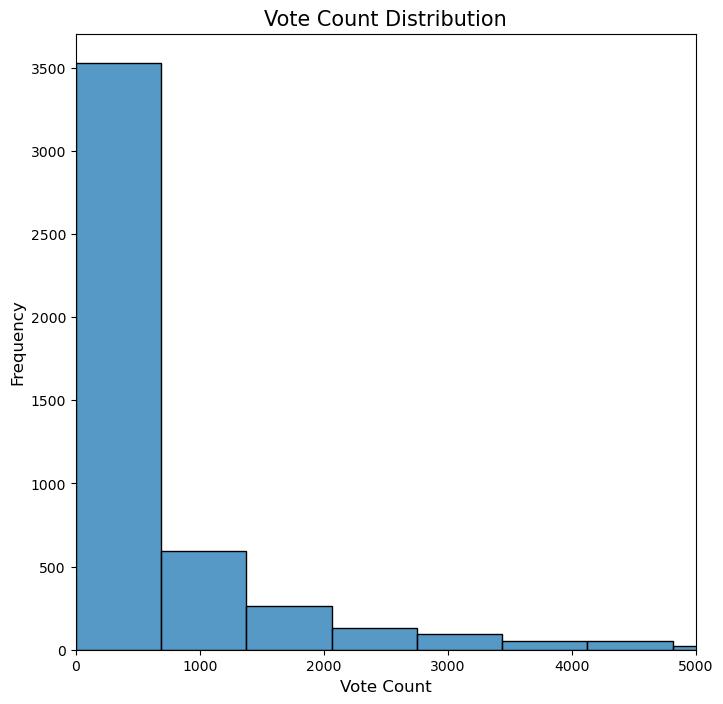

In [36]:
# Vote Count description
vote_count_univariate = movies_credits['vote_count'].describe()
print(vote_count_univariate)

# Plot vote count distribution
plt.figure(figsize=(8, 8))
sns.histplot(movies_credits['vote_count'], kde = False , bins = 20)
plt.xlabel("Vote Count", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.xlim(0, 5000)
plt.title("Vote Count Distribution", fontsize=15)
plt.savefig(".data/images/vote_count_plot")
plt.show()

From the plot above we can determine that the vote count decreases hence a low concentarationtion for the vote counts 

* Vote Average

count    4803.000000
mean        6.092172
std         1.194612
min         0.000000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64


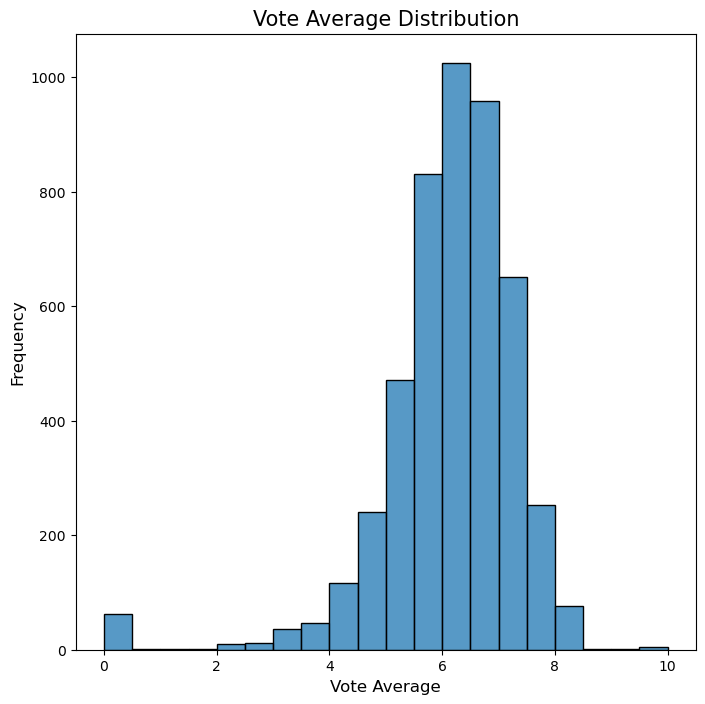

In [37]:
vote_average_univariate = movies_credits['vote_average'].describe()
print(vote_average_univariate)

# Plot the vote average distribution
plt.figure(figsize=(8, 8))
sns.histplot(movies_credits['vote_average'], kde = False , bins = 20)
plt.xlabel("Vote Average", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Vote Average Distribution", fontsize=15)
# save the figure
plt.savefig(".data/images/vote_average_plot")
# show the figure
plt.show()

The vote average is normallly distributed with the majority of it being 6-8. 

### Check for existence of outliers



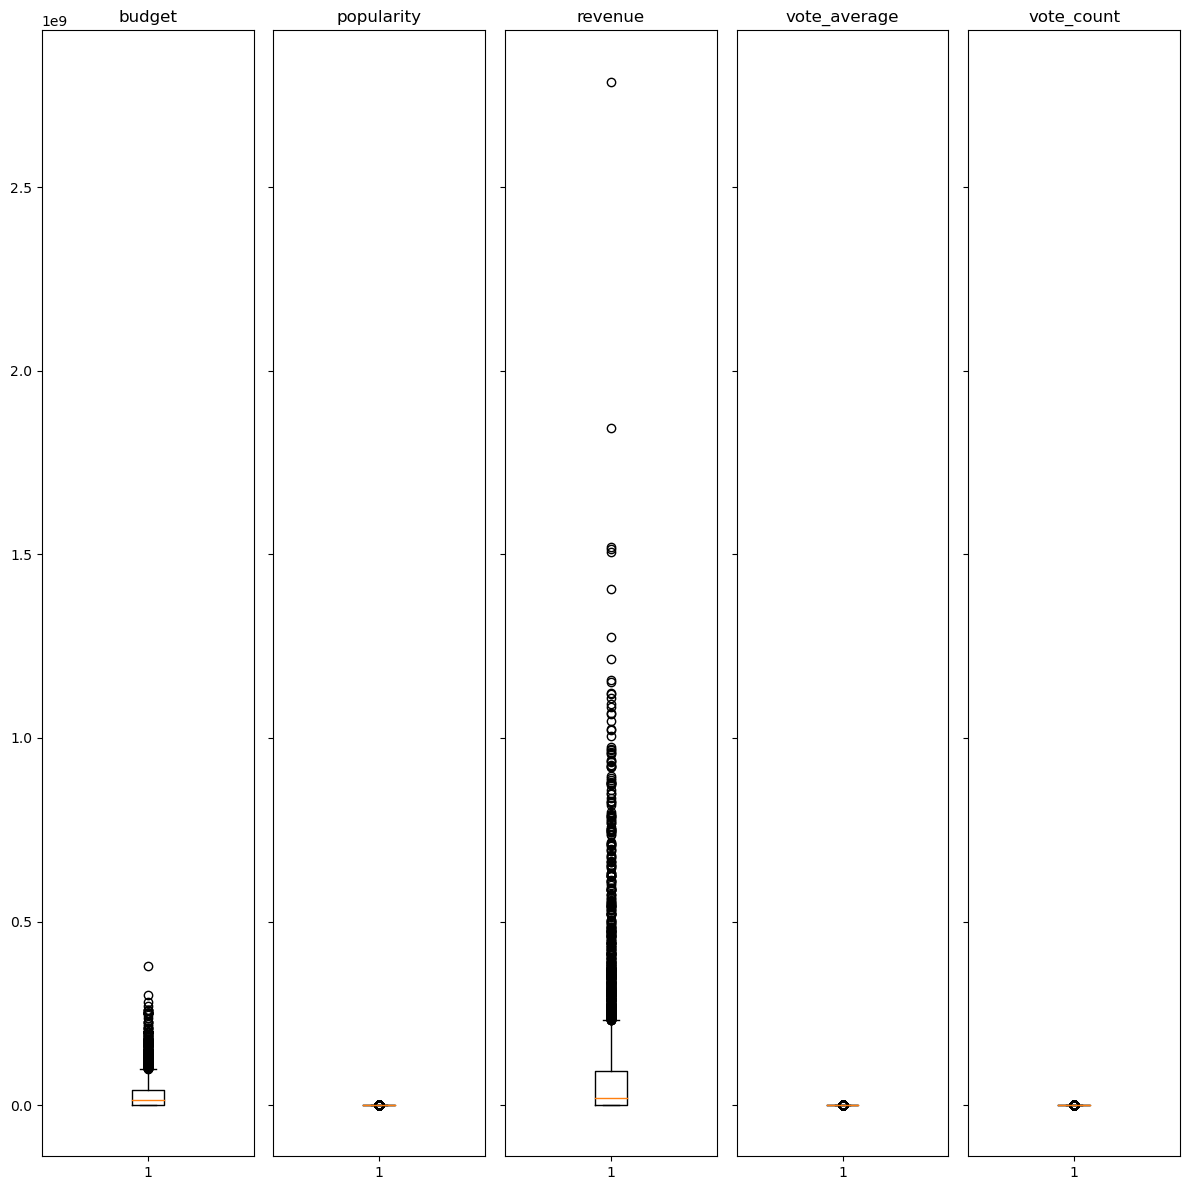

In [38]:
# Select the variables you want to plot

cols_to_plot = ['budget', 'popularity', 'revenue', 'vote_average', 'vote_count']

######## Create a subplot grid
fig, axes = plt.subplots(nrows=1, ncols=len(cols_to_plot), figsize=(12, 12), sharey=True)

####### Create a boxplot for each variable in a separate subplot
for i, col in enumerate(cols_to_plot):
    axes[i].boxplot(movies_credits[col])
    axes[i].set_title(col)
    axes[i].tick_params(axis='both', which='major')

# Adjust spacing between subplots
plt.tight_layout()
# save te figure
plt.savefig(".data/images/Outliers")
# Show the figure
plt.show()

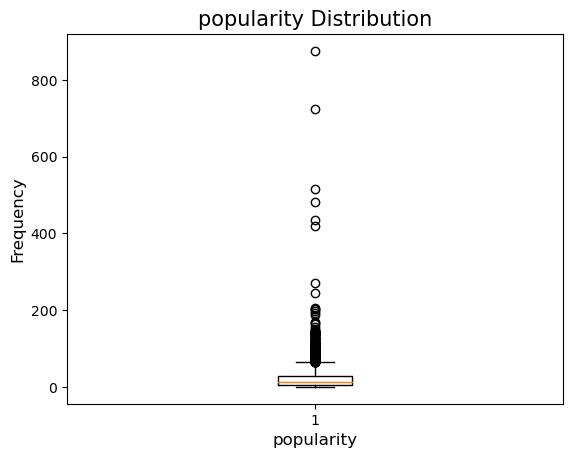

In [39]:
# Checking for outliers in the 'popularity' column
plt.boxplot(movies_credits['popularity'])
plt.xlabel("popularity", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("popularity Distribution", fontsize=15)
# save the figure
plt.savefig(".data/images/popularity_outliers_plot")
plt.show()

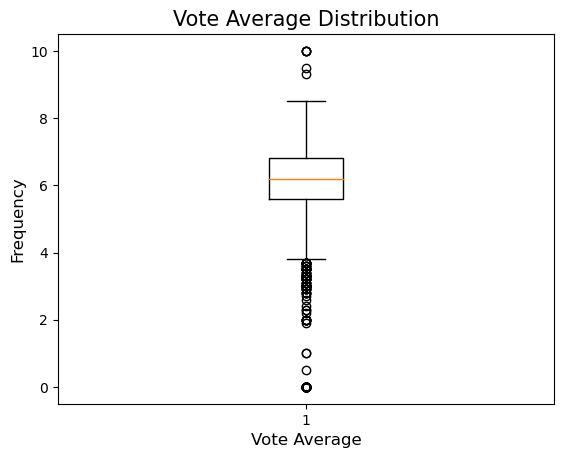

In [40]:
## Checking for outliers in the 'vote average' column
plt.boxplot(movies_credits['vote_average'])
plt.xlabel("Vote Average", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.title("Vote Average Distribution", fontsize=15)
# save the figure
plt.savefig(".data/images/vote_average_outliers_plot")
plt.show()

There are outliers from 0-4 and 8-10, hence we remove them 

In [41]:
movies_credits['popularity'].nlargest(10)

546    875.581305
95     724.247784
788    514.569956
94     481.098624
127    434.278564
28     418.708552
199    271.972889
82     243.791743
200    206.227151
88     203.734590
Name: popularity, dtype: float64

In [42]:
result = (movies_credits['popularity']  >= 200 ).value_counts()

movies_credits['popularity'].nsmallest(10)

4553    0.000000
3361    0.000372
4727    0.001117
4118    0.001186
4625    0.001389
4509    0.001586
4305    0.002386
4721    0.002388
4487    0.003142
4589    0.003352
Name: popularity, dtype: float64

In [43]:
# Define the lower and upper bounds for the outliers
lower_bound = 0
upper_bound = 400

# Remove outliers from the 'vote_average' column
movies_credits_filtered = movies_credits[(movies_credits['popularity'] >= lower_bound) & (movies_credits['popularity'] <= upper_bound)]

# Display the shape filtered dataset without outliers
movies_credits_filtered.shape

(4797, 23)

In [44]:
# Define the lower and upper bounds for the outliers
lower_bound = 2
upper_bound = 8

# Remove outliers from the 'vote_average' column
movies_credits_filtered = movies_credits[(movies_credits['vote_average'] >= lower_bound) & (movies_credits['vote_average'] <= upper_bound)]

# Display the shape filtered dataset without outliers
movies_credits_filtered.shape

(4686, 23)

* Keywords

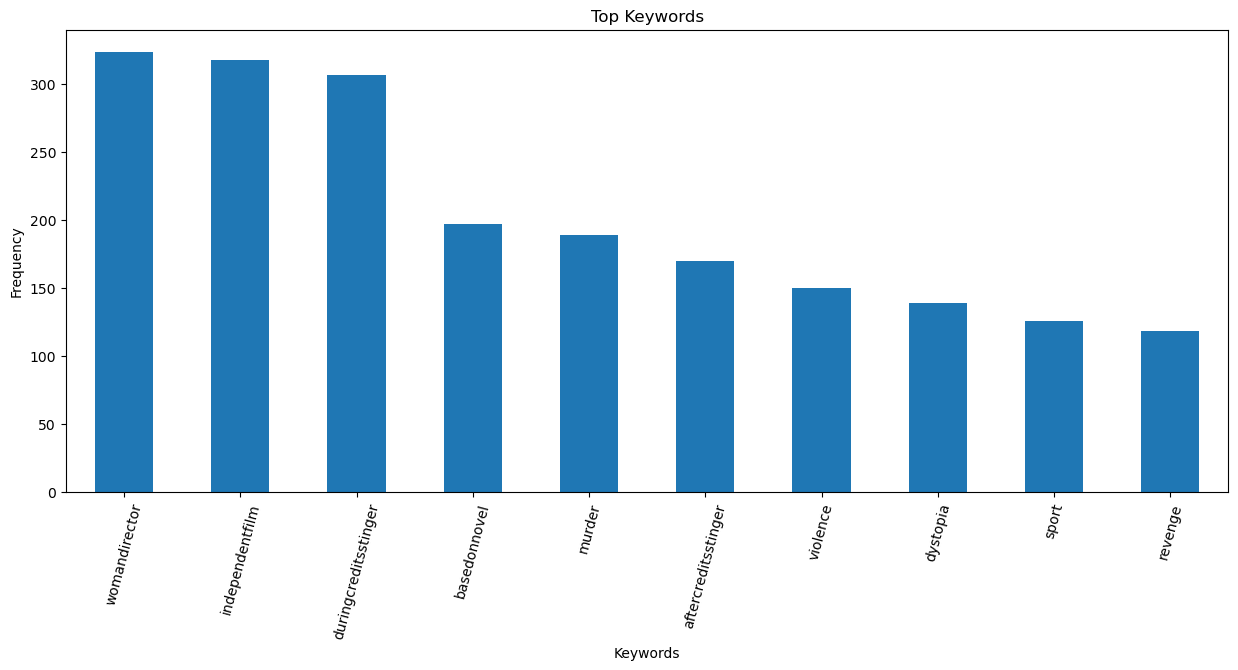

In [45]:
# Extract the 'keywords' column
keywords = movies_credits['keywords']

# Flatten the list of keywords
flat_keywords = [keyword for sublist in keywords for keyword in sublist]

# Count the frequency of each keyword
keyword_counts = pd.Series(flat_keywords).value_counts().head(10)

# Select the top keywords
top_keywords = keyword_counts.head(20) 

# Plot the top keywords
plt.figure(figsize=(15, 6))
top_keywords.plot(kind='bar')
plt.title('Top Keywords')
plt.xlabel('Keywords')
plt.ylabel('Frequency')
plt.xticks(rotation=75)
# save the figure
plt.savefig(".data/images/Keywords_plot")
plt.show()

* Genres

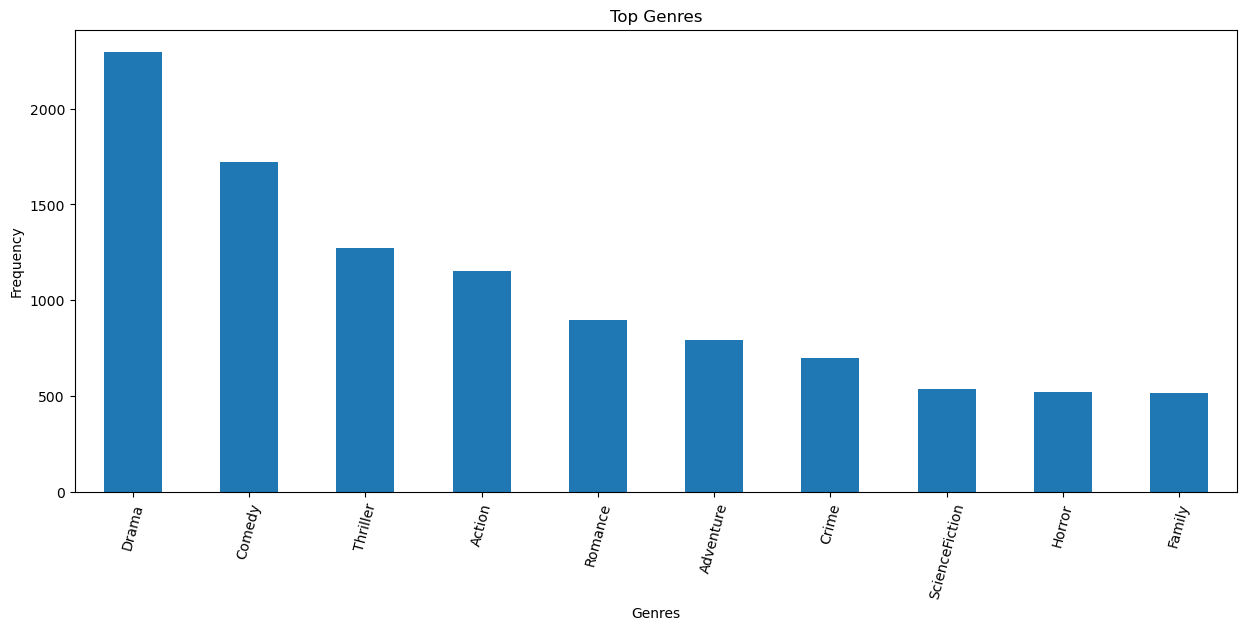

In [46]:
# Extract the 'genres' column
genres = movies_credits['genres']

# Flatten the list of genres
flat_genres = [genre for sublist in genres for genre in sublist]

# Count the frequency of each genre
genre_counts = pd.Series(flat_genres).value_counts()

# Select the top genres
top_genres = genre_counts.head(10)

# Plot the top genres
plt.figure(figsize=(15, 6))
top_genres.plot(kind='bar')
plt.title('Top Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=75)
# save the figure
plt.savefig('.data/images/top_genres')
plt.show()

* Spoken Languages

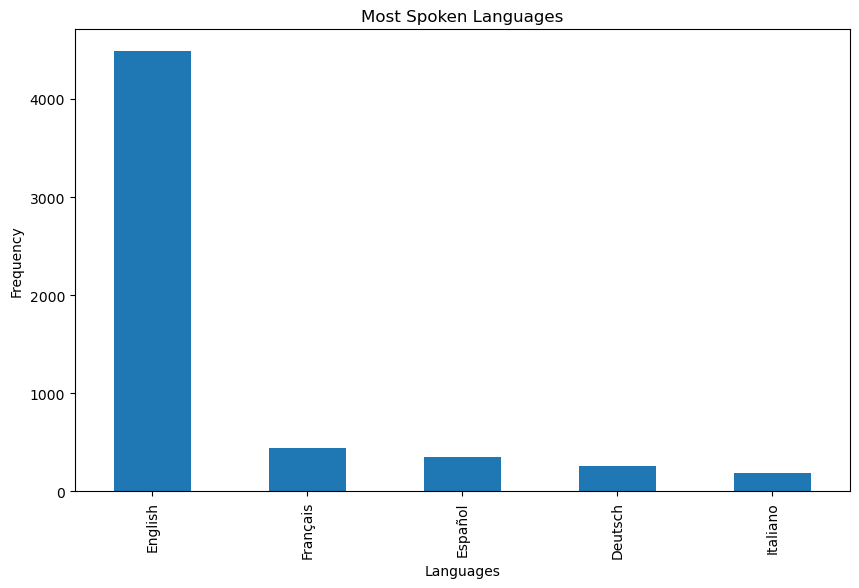

In [47]:
# Extract the 'spoken_languages' column
spoken_languages = movies_credits['spoken_languages']

# Flatten the list of spoken languages
flat_languages = []
for sublist in spoken_languages:
    if isinstance(sublist, str):
        sublist = ast.literal_eval(sublist)
    for language in sublist:
        if isinstance(language, dict):
            flat_languages.append(language['name'])

# Count the frequency of each spoken language
language_counts = pd.Series(flat_languages).value_counts()

# Select the top spoken languages
top_languages = language_counts.head(5)  # Change the number to select more or fewer top languages

# Plot the top spoken languages
plt.figure(figsize=(10, 6))
top_languages.plot(kind='bar')
plt.title('Most Spoken Languages')
plt.xlabel('Languages')
plt.ylabel('Frequency')
plt.savefig('.data/images/most_spoken_languages')
plt.show()

* Movie Status

In [48]:
movies_credits['status'].value_counts()

status
Released           4795
Rumored               5
Post Production       3
Name: count, dtype: int64

* Production Companies

Top company collaborations

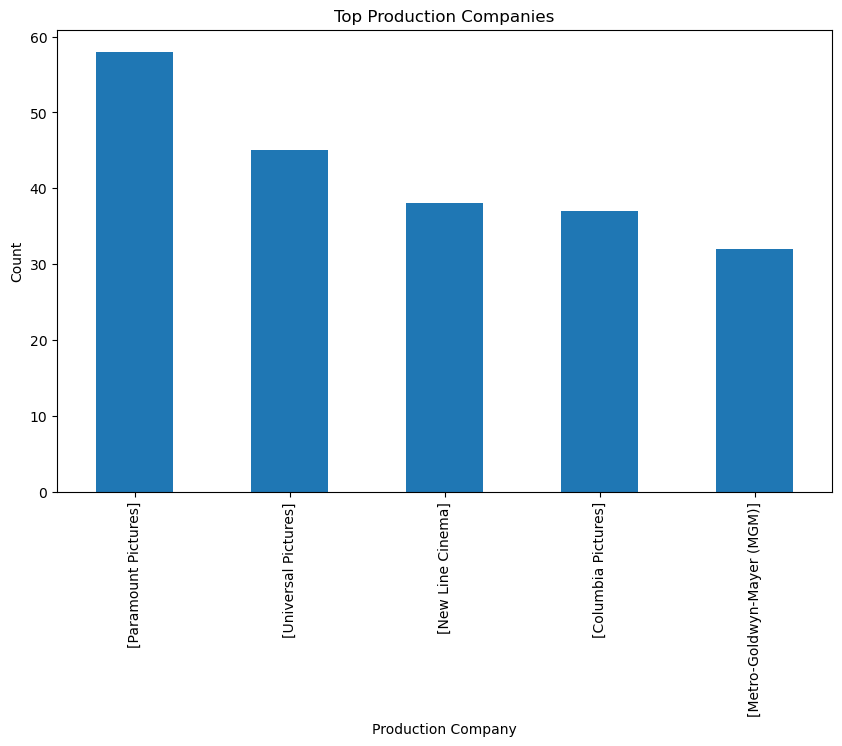

In [49]:
# Get value counts of production companies
production_company_counts = movies_credits['production_companies'].value_counts()

# Select the top 5 production companies
top_production_companies = production_company_counts[1:6]

# Plot the top production companies
plt.figure(figsize=(10, 6))
top_production_companies.plot(kind='bar')
plt.title('Top Production Companies')
plt.xlabel('Production Company')
plt.ylabel('Count')
plt.savefig('.data/images/top_production_companies')
plt.show()

Top companies individually

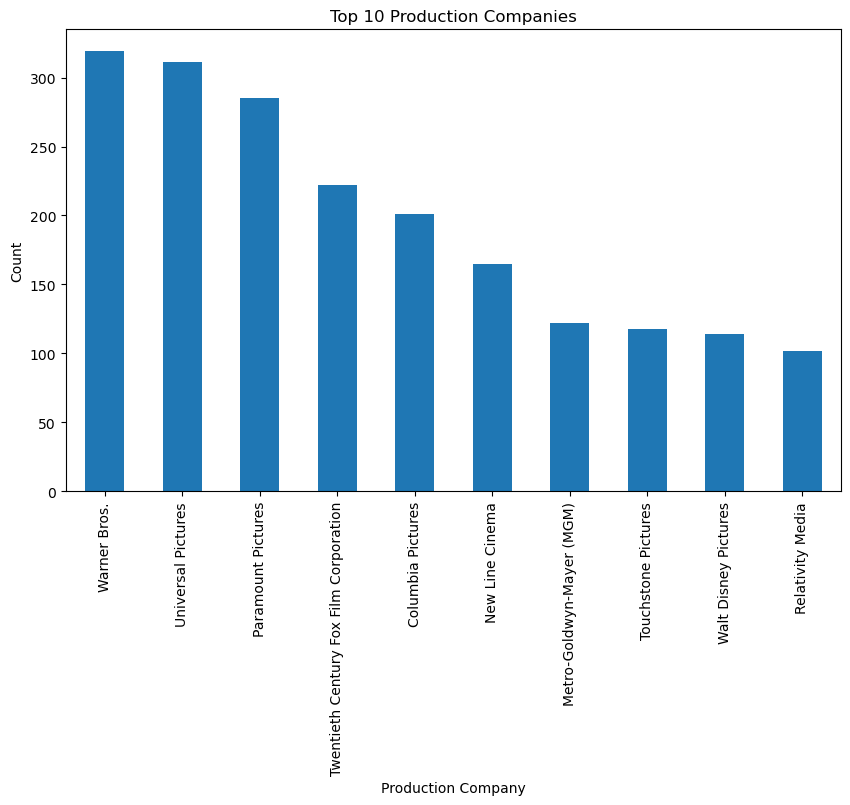

In [50]:
# Plotting 'production_companies' (top 10)
plt.figure(figsize=(10, 6))
top_10_production_companies = movies_credits['production_companies'].explode().value_counts().head(10)
top_10_production_companies.plot(kind='bar')
plt.title('Top 10 Production Companies')
plt.xlabel('Production Company')
plt.ylabel('Count')
plt.savefig('.data/images/top_10_production_companies')
plt.show()

* Popularity

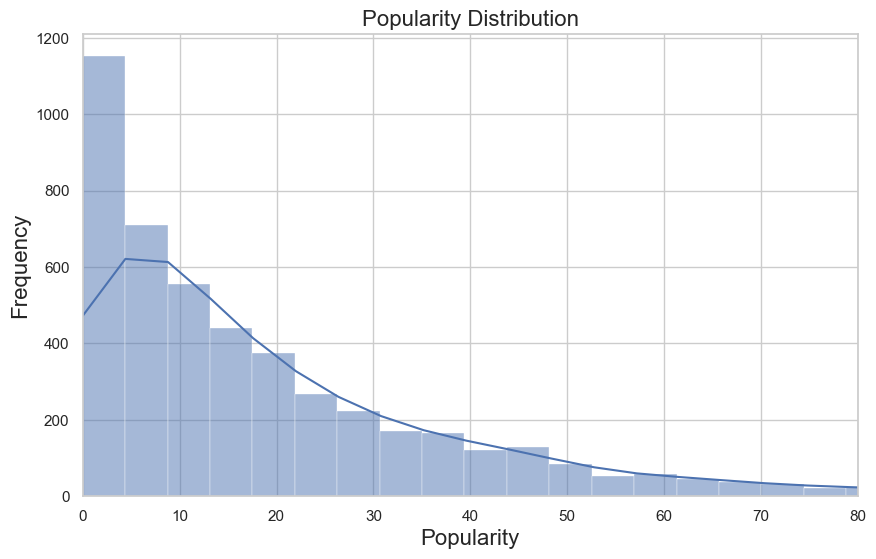

In [51]:
# Set the style and context
sns.set(style='whitegrid')

# Histogram for popularity
plt.figure(figsize=(10, 6))
sns.histplot(data=movies_credits, x='popularity', bins=200, kde=True)
plt.title('Popularity Distribution', fontsize=16)
plt.xlabel('Popularity', fontsize=16)
plt.ylabel('Frequency', fontsize=16)
plt.xlim(0, 80)  # Set the x-axis limits
plt.show()

* Release date

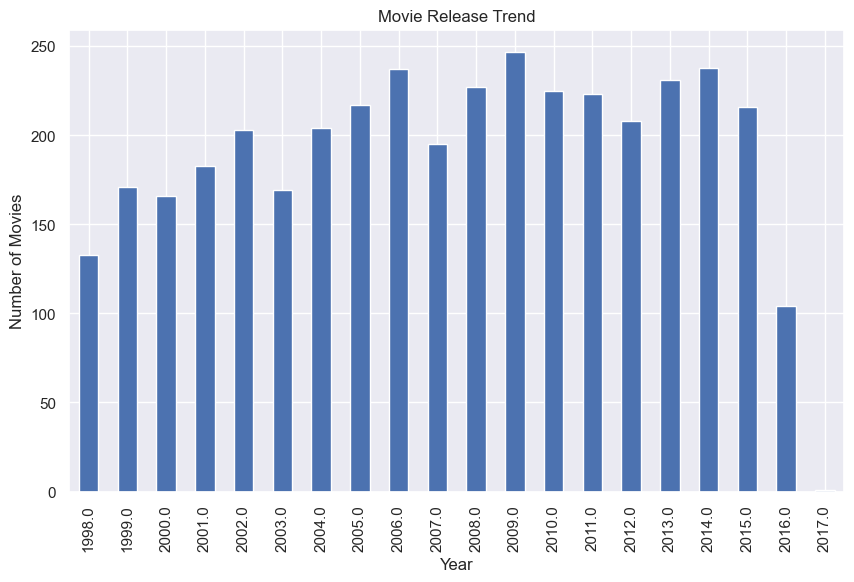

In [52]:
# Set the style and context for Seaborn
sns.set(style='darkgrid')

# Line plot for release_date
plt.figure(figsize=(10, 6))
movies_credits['release_date'] = pd.to_datetime(movies_credits['release_date'], format='%Y-%m-%d', errors='coerce')
movies_counts = movies_credits.groupby(movies_credits['release_date'].dt.year)['release_date'].count().tail(20)
movies_counts.plot(kind='bar')
plt.title('Movie Release Trend')
plt.xlabel('Year')
plt.ylabel('Number of Movies')

plt.savefig(".data/images/movies_Reease_year")
plt.show()

* Word Cloud of Movie Overviews

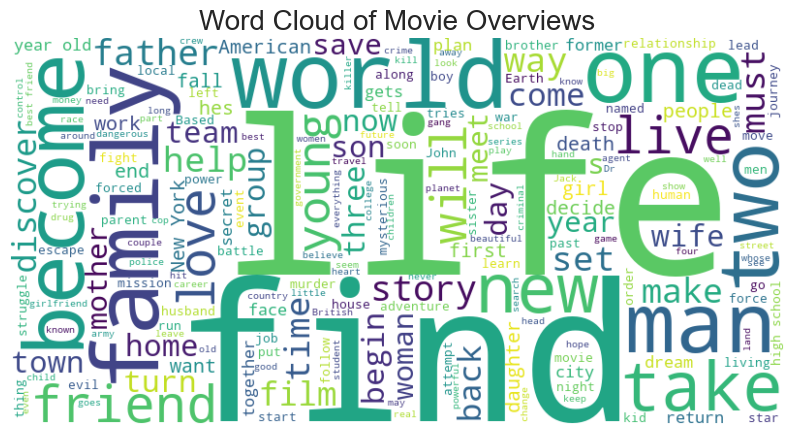

In [53]:
# Concatenate all overview strings into a single string and remove single quotes
overview_text = ' '.join([str(overview).replace("'", "") for overview in movies_credits['overview']])

# Word cloud for overview
plt.figure(figsize=(10, 6))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(overview_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Word Cloud of Movie Overviews', fontsize=20)
plt.axis('off')
plt.savefig(".data/images/wordcloud")
plt.show()



II. **Bivariate Analysis**

* Original Title vs Popularity

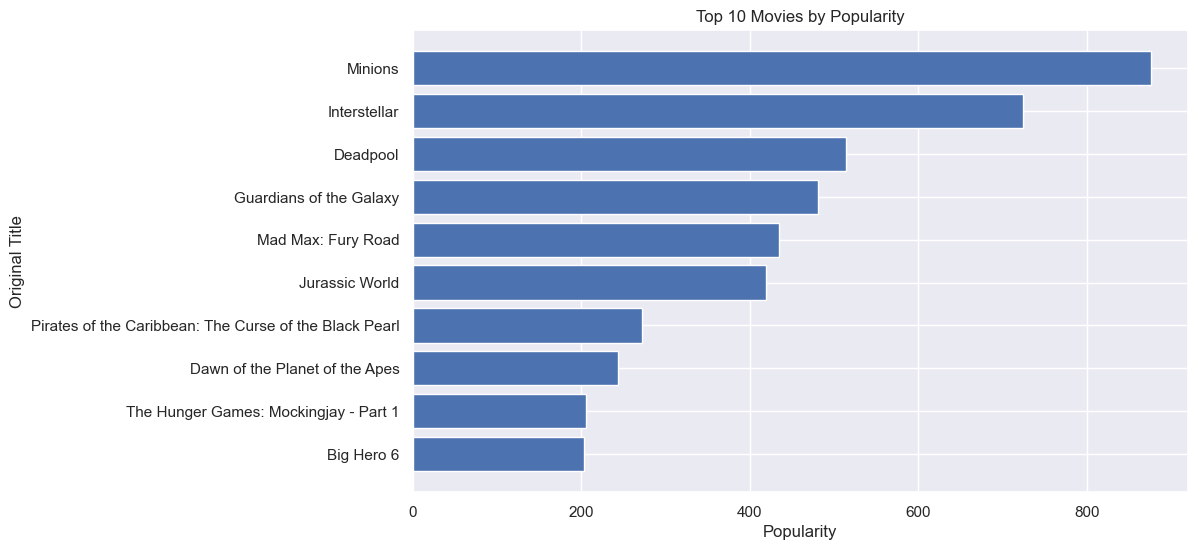

In [54]:
# Plotting 'original_title'against popularity (top 10 movies)
plt.figure(figsize=(10, 6))
top_10_movies = movies_credits.sort_values('popularity', ascending=False).head(10)
plt.barh(top_10_movies['original_title'], top_10_movies['popularity'])
plt.title('Top 10 Movies by Popularity')
plt.xlabel('Popularity')
plt.ylabel('Original Title')
plt.gca().invert_yaxis()
plt.savefig('.data/images/top_10_movies_popularity')
plt.show()

* Popularity vs Revenue

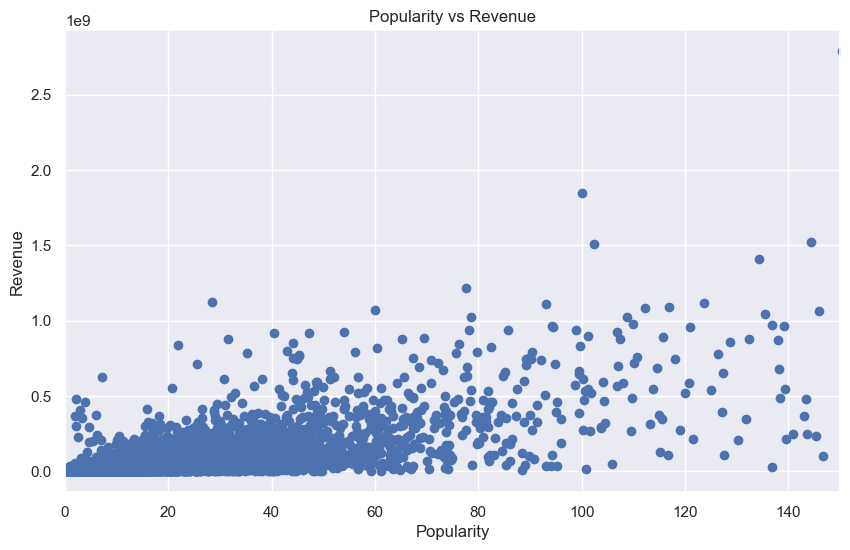

In [55]:
# Plotting 'popularity' vs 'revenue'
plt.figure(figsize=(10, 6))
plt.scatter(movies_credits['popularity'], movies_credits['revenue'])
plt.title('Popularity vs Revenue')
plt.xlabel('Popularity')
plt.xlim(0, 150)
plt.ylabel('Revenue')
plt.savefig('.data/images/popularity vs revenue')
plt.show()

* Number of Movies by original language of production

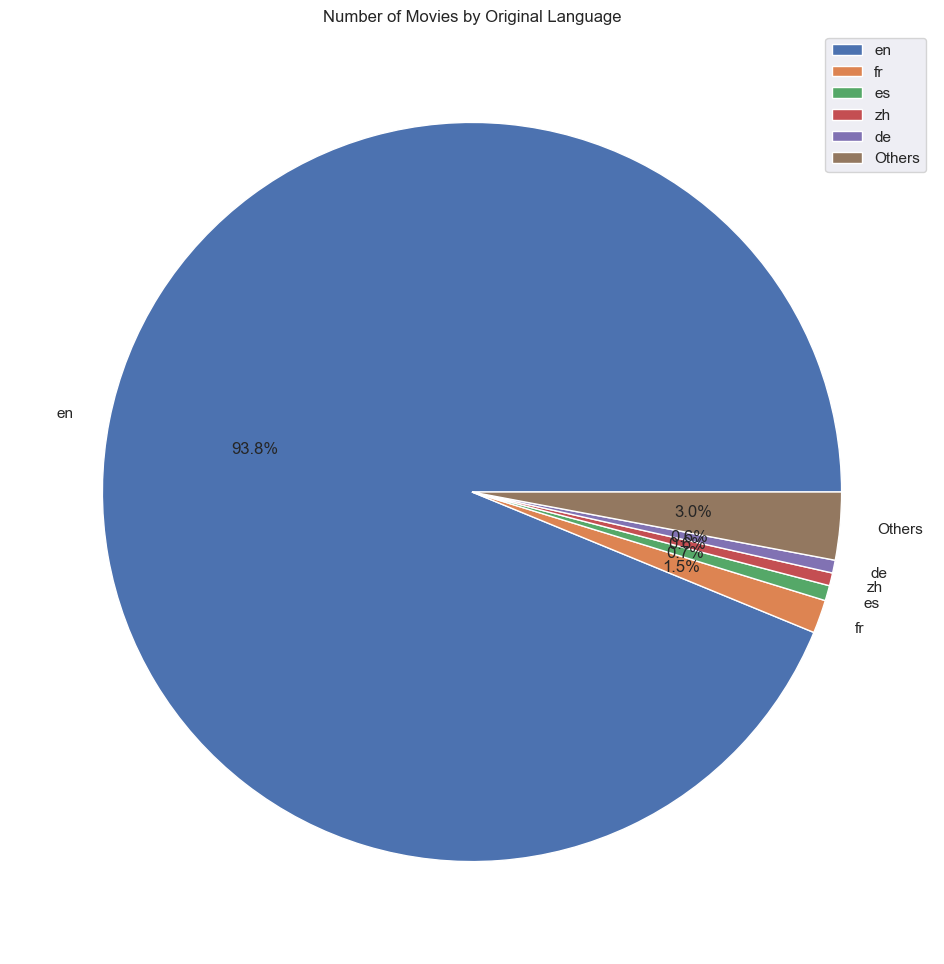

In [56]:
 #Get value counts of original languages
original_language_counts = movies_credits['original_language'].value_counts()

# Get the top 5 languages
top_languages = original_language_counts[:5]

# Calculate the count for the "Others" category
others_count = original_language_counts[5:].sum()

# Create a new series with the top 5 languages and "Others"
languages_data = pd.concat([top_languages, pd.Series(others_count, index=['Others'])])

# Plotting 'original_language'
plt.figure(figsize=(12, 12))
languages_data.plot(kind='pie', autopct='%1.1f%%')
plt.title('Number of Movies by Original Language')
plt.ylabel('')

# Add labels to the pie chart
plt.legend(labels=languages_data.index)
plt.savefig('.data/images/no_movies by language')
plt.show()

Movies by production country

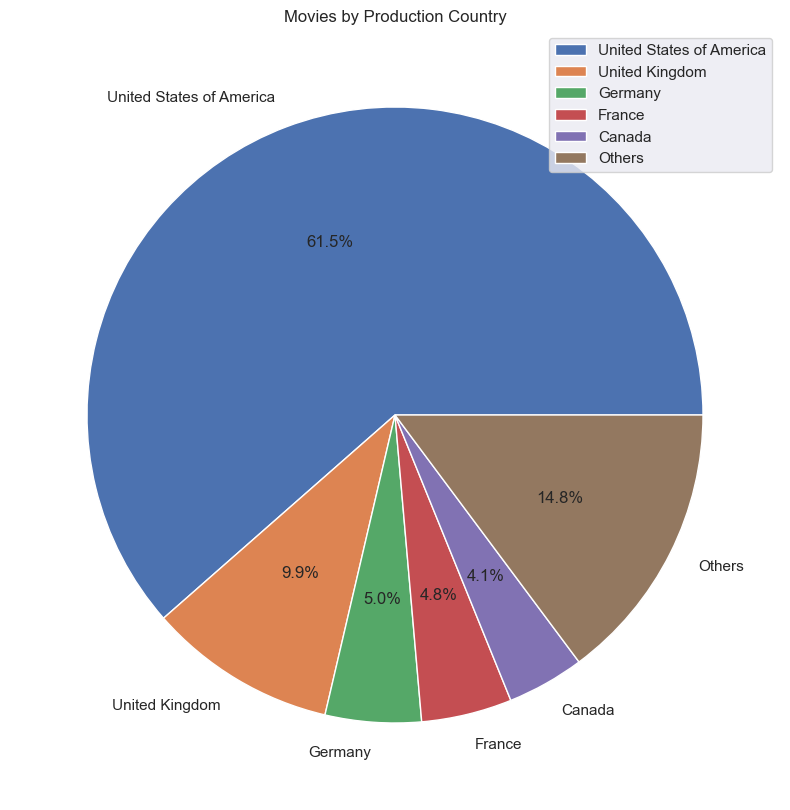

In [57]:
# Get value counts of production countries
production_countries_counts = movies_credits['production_countries'].explode().value_counts()

# Get the top five production countries
top_countries = production_countries_counts[:5]

# Calculate the count for the sixth slice ("others")
others_count = production_countries_counts[5:].sum()

# Create a new series with the top five countries and "others"
countries_data = pd.concat([top_countries, pd.Series(others_count, index=['Others'])])

# Plotting 'production_countries'
plt.figure(figsize=(20, 10))
countries_data.plot(kind='pie', autopct='%1.1f%%')
plt.title('Movies by Production Country')
plt.ylabel('')

# Labeling the countries
plt.legend(labels=countries_data.index, loc='best')
plt.savefig('.data/images/movies_countries')
plt.show()


* Movies by release year

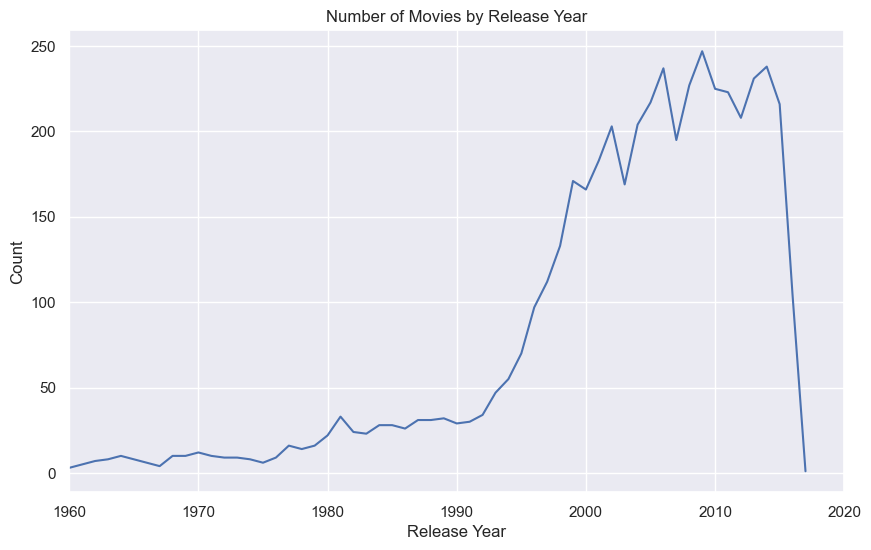

In [58]:
# Plotting 'release_date' (yearly distribution)
movies_credits['release_year'] = pd.to_datetime(movies_credits['release_date']).dt.year

plt.figure(figsize=(10, 6))
movies_credits['release_year'].value_counts().sort_index().plot(kind='line')
plt.title('Number of Movies by Release Year')
plt.xlabel('Release Year')
plt.xlim(1960, 2020 )
plt.ylabel('Count')
plt.savefig('.data/images/movies_by_release_year')
plt.show()


* Revenue vs Runtime

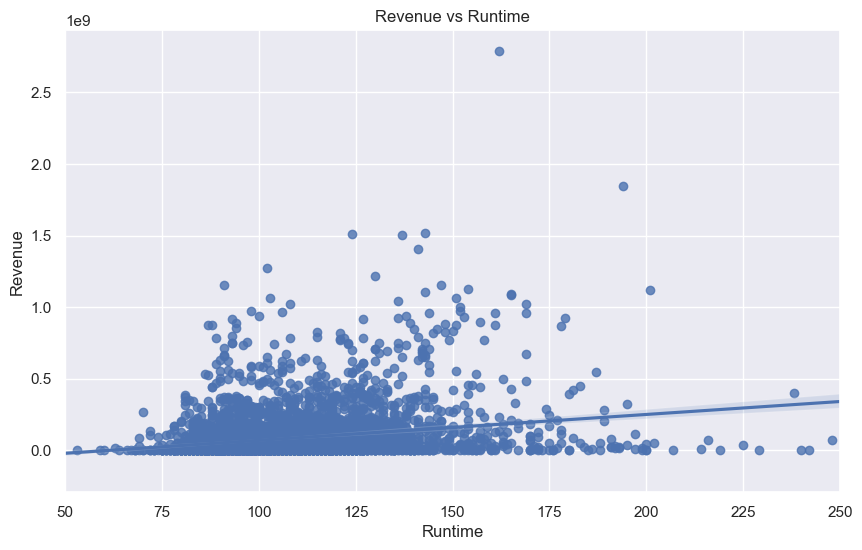

In [59]:
# Plotting 'revenue' and 'runtime' (scatter plot with regression line)
plt.figure(figsize=(10, 6))
sns.regplot(x='runtime', y='revenue', data=movies_credits)
plt.title('Revenue vs Runtime')
plt.xlabel('Runtime')
plt.xlim(50, 250)
plt.ylabel('Revenue')
plt.savefig('.data/images/revenue_vs_runtime')
plt.show()

## Modeling 

####  i ) Demographic Recommendation based on Popularity 

This model suggests movies to users based on their demographic attributes and the overall popularity of the movies.

Here, we sort the movie/credits based on ratings and display the top movies. 
- Improve accuracy of the recommendations 
- Create a metric to score or rate the movies.
- Calculate the score for each movie.
- Sort the scores and recommend the highest-rated movie to the users.

Implement the following Formula 

Weighted Rating (WR) = (vv+m.R) / (v+m)

Where:
* v is the number of votes for the movie.
* m is the minimum votes required to be listed in the chart.
* R is the average rating of the movie.

In [60]:
movies_credits['vote_average'].mean()

6.092171559442016

In [61]:
# Determine the appropriate value of M
movies_credits['vote_count'].quantile(q=0.9)

1838.4000000000015

In [62]:
# Filter and put them in a new dataframe
new_dataframe_filtered=movies_credits[movies_credits['vote_count']>movies_credits['vote_count'].quantile(q=0.9)]

In [63]:
# Check the shape of the new dataframe
new_dataframe_filtered.shape

(481, 24)

In [64]:
# Calculate score for each qualified movie
def movie_score(x):
    v=x['vote_count']
    m=movies_credits['vote_count'].quantile(q=0.9)
    R=x['vote_average']
    C=movies_credits['vote_average'].mean()
    return ((R*v)/(v+m))+((C*m)/(v+m))

* we have to use  .loc explicitly when trying to splice a pandas dataframe. This allows us to set the values in the 'score column for the rows of the new dataframe 

In [148]:
# By using the '.loc and set the new values
new_dataframe_filtered.loc[:, 'score'] = new_dataframe_filtered.apply(movie_score, axis=1)

####  Finding movie popularity 

In [66]:
# Sort by the popularity column
popular_movies = movies_credits.sort_values('popularity', ascending = False).head()
popular_movies[['title', 'vote_count','vote_average','popularity']]

,title,vote_count,vote_average,popularity
546,Minions,4571,6.4,875.581305
95,Interstellar,10867,8.1,724.247784
788,Deadpool,10995,7.4,514.569956
94,Guardians of the Galaxy,9742,7.9,481.098624
127,Mad Max: Fury Road,9427,7.2,434.278564


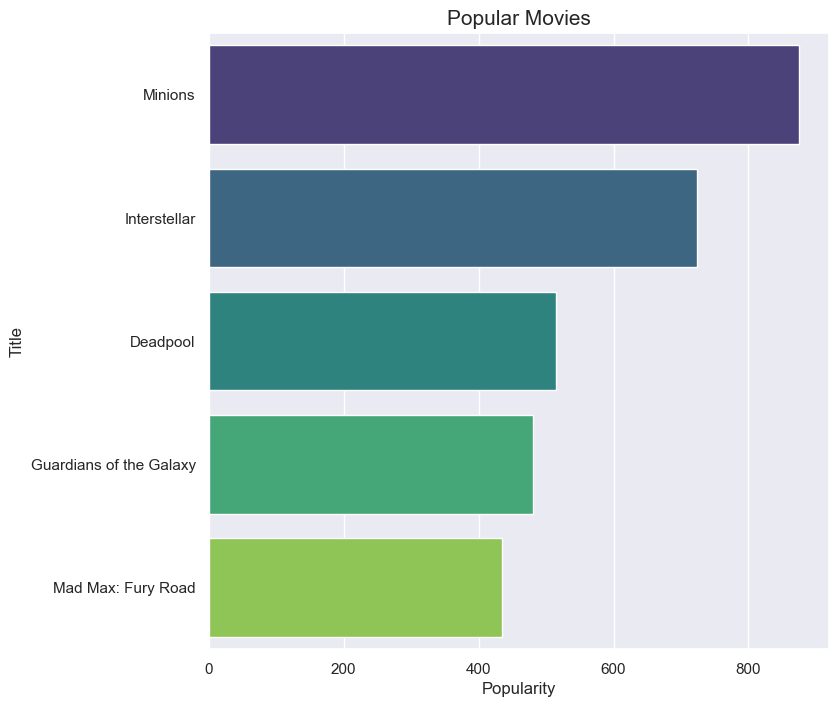

In [67]:
plt.figure(figsize=(8, 8))
sns.barplot(x='popularity', y='title', data=popular_movies, palette='viridis')
plt.xlabel("Popularity", fontsize=12)
plt.ylabel("Title", fontsize=12)
plt.title("Popular Movies", fontsize=15)
plt.savefig(".data/images/popular movies")
plt.show()



* From the plot above we can see that the most popular movie is minions with a popularity rate of > 800; hence being highly recommended to be watched by the user/ rather recommend users to watch

In [68]:
# We sort the filtered dataframe based on the score feature
new_highscore=new_dataframe_filtered.sort_values(by='score', ascending=False).head()
new_highscore[['title', 'vote_count','vote_average','popularity', 'score']]

,title,vote_count,vote_average,popularity,score
1881,The Shawshank Redemption,8205,8.5,136.747729,8.059258
662,Fight Club,9413,8.3,146.757391,7.939256
65,The Dark Knight,12002,8.2,187.322927,7.920020
3232,Pulp Fiction,8428,8.3,121.463076,7.904645
96,Inception,13752,8.1,167.583710,7.863239


Here we will create a new column for Weighted Rating by taking into account the vote count and vote average for each user from the previous dataset.
A weighted score is mainly defined as the mean of grades for each subject (interest) multiplied by its counterweight (division decimal). It is obtained by multiplying each score by its weight (percentage) and add the products together, then divide by the sum of the weights.


Below we well now take in the ratings dataset in order to do more predictive modelling. This dataset contains a ratings column for each user provided rating per movie.

In [69]:
# Step 1: Calculate values for the formula
v = movies_credits['vote_count']
R = movies_credits['vote_average']
m = 1000  # Choose a minimum vote threshold

# Step 2: Compute weighted rating (WR)
C = movies_credits['vote_average'].mean()
WR = (v / (v + m) * R) + (m / (v + m) * C)

# Step 3: Add 'Weighted_Rating' column to DataFrame
movies_credits['Weighted_Rating'] = WR

# Step 4: Sort the DataFrame based on 'Weighted_Rating' column
sorted_movies = movies_credits.sort_values('Weighted_Rating', ascending=False)

# Step 5: Display top movies based on sorted results
top_movies = sorted_movies[['title', 'vote_average','genres', 'Weighted_Rating']].head(10)
top_movies

,title,vote_average,genres,Weighted_Rating
1881,The Shawshank Redemption,8.5,"[Drama, Crime]",8.238422
662,Fight Club,8.3,[Drama],8.087974
3232,Pulp Fiction,8.3,"[Thriller, Crime]",8.065822
3337,The Godfather,8.4,"[Drama, Crime]",8.065192
65,The Dark Knight,8.2,"[Drama, Action, Crime, Thriller]",8.037884
96,Inception,8.1,"[Action, Thriller, ScienceFiction, Mystery, Ad...",7.963894
809,Forrest Gump,8.2,"[Comedy, Drama, Romance]",7.963882
95,Interstellar,8.1,"[Adventure, Drama, ScienceFiction]",7.930806
1990,The Empire Strikes Back,8.2,"[Adventure, Action, ScienceFiction]",7.893585
1818,Schindler's List,8.3,"[Drama, History, War]",7.885696


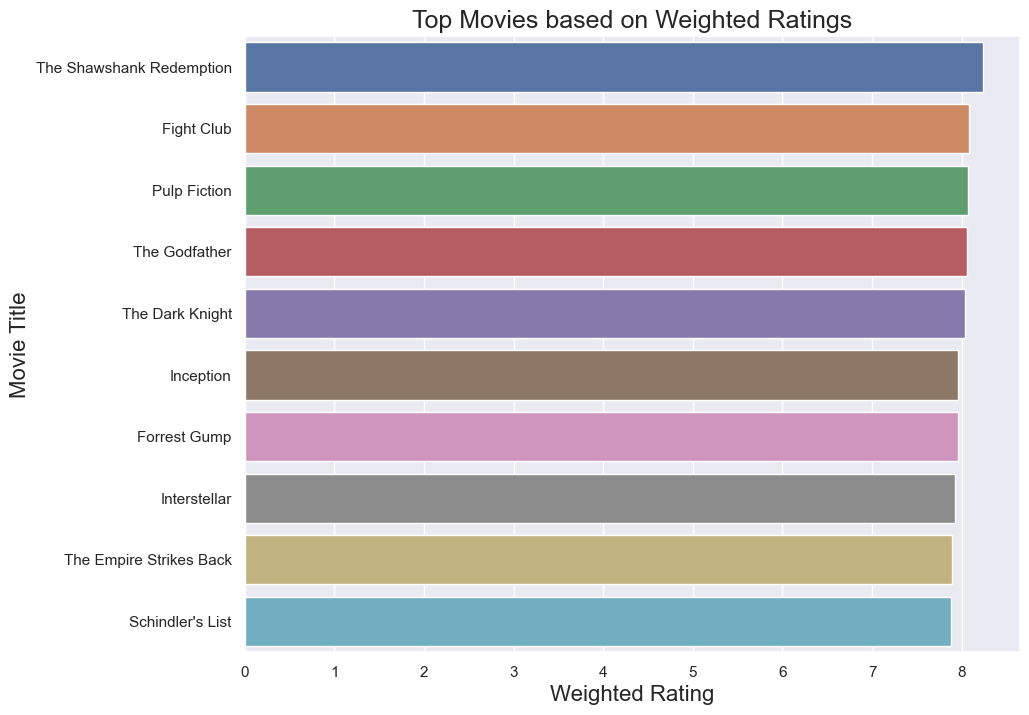

In [70]:
# Step 6: Plot the data
fig, ax = plt.subplots(figsize=(10, 8))
sns.barplot(x=top_movies['Weighted_Rating'], y=top_movies['title'], ax=ax)
ax.set_xlabel('Weighted Rating', fontsize=16)
ax.set_ylabel('Movie Title', fontsize=16)
ax.set_title('Top Movies based on Weighted Ratings', fontsize=18)
plt.savefig(".data/images/Top weighted movies")
plt.show()

We observe that by taking the weighted rating, we observe that the movie Tha Dark Night is not as common as portrayed. This is taking into account the fact that the earlier one was a scoring while the second is the weighted rating

* We should keep in mind that this demographic recommender provide a general chart of recommended movies to all the users, regardless of the user's personal taste. It is not sensitive to the interests and tastes of a particular user, and it does not give personalized recommendations based on the users.

## ii) Content Based

> For this recommendation system we build an engine that shows the similarity between movie based and the metrics new_dataframe_filtered.
> Secondly, this will be in two segments :
* Movie Overview
* Movie Cast , Keywords and Genre

* 1.Movie Overview Recommendation
- We use this because it provides a concise description of its storyline, theme, and main elements. It offers insights into the narrative and helps to understand the central idea or premise of the movie.
> We pair the similar scores of the movies based on the overview 

In [71]:
movies_credits ['overview'].head()

# Finding the Nan values(missing values) with an empty string 

movies_credits['overview'].isnull().sum()# We know there 3 missing values hence we replace them

# Replacing the missing values
movies_credits['overview'].fillna('', inplace = True)

In [72]:
# Confirm if there are Missing values
movies_credits['overview'].isnull().sum()

0

In [73]:
# Convert the 'overview' column to string type
movies_credits['overview'] = movies_credits['overview'].apply(lambda x: ' '.join(x) if isinstance(x, list) else '')

In this case we implement the use of 'Term frequency-Inverse Documnet Frequency which is a numerical representation used to evaluate the key importance of the collection of documents.

It calculates the ratio of the number of times a term appears in a text

In [74]:
movie_rating

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [75]:
# Construct the TF-IDF Matrix
tfidfv=TfidfVectorizer(analyzer='word', stop_words='english')
tfidfv_matrix=tfidfv.fit_transform(movies_credits['overview'])
print(tfidfv_matrix.todense())
tfidfv_matrix.todense().shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(4803, 20978)

Computing the same Score based on the movie Similiarities


In [76]:
# Calculate similarity matrix
cosine_sim = cosine_similarity(tfidfv_matrix, tfidfv_matrix)

In [77]:
cosine_sim.shape

(4803, 4803)

In [78]:
# Create a Pandas Series to map movie titles to their indices
indices = pd.Series(data = list(movies_credits.index), index = movies_credits['title'])
indices

title
Avatar                                         0
Pirates of the Caribbean: At World's End       1
Spectre                                        2
The Dark Knight Rises                          3
John Carter                                    4
                                            ... 
El Mariachi                                 4798
Newlyweds                                   4799
Signed, Sealed, Delivered                   4800
Shanghai Calling                            4801
My Date with Drew                           4802
Length: 4803, dtype: int64

In the cell below, we create a function named `recommended_movies` that takes two parameters: `title` and `cosine_sim`. It uses the `indices` Series to map movie titles to their corresponding indices. Then, it calculates the pairwise similarity scores between the movie specified by the `title` parameter and all other movies based on the cosine similarity matrix `cosine_sim`.

In [79]:
def recommended_movies(title, cosine_sim):
    
    #indices = {title: index for index, title in enumerate(movies_data['title'])}
    
    # Get the index of the movie that matches the title
    idx = indices[title]
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores=sim_scores[1:11]
    
    # Get the movie indices
    ind=[]
    for (x,y) in sim_scores:
        ind.append(x)
        
    # Return the top 10 most similar movies
    tit=[]
    for x in ind:
        tit.append(movies_credits.iloc[x]['title'])
    return pd.Series(data=tit, index=ind)

In [80]:
# Applying the function
recommended_movies('My Date with Drew', cosine_sim)

4100              Captive
868         Elizabethtown
2586          Firestarter
204             Fast Five
1685    Keeping the Faith
4532         Lonesome Jim
2156           Nancy Drew
3753              Boyhood
3623                 Made
3245                50/50
dtype: object

* While our system has done a decent job of finding movies with similar overviews and descriptions, the quality of recommendations is not that great. "My Date with Drew" returns all Batman movies while it is more likely that the people who liked that movie are more inclined to enjoy other movies. This is something that cannot be captured by the present system.

2. Movie Cast , Keywords and Genre Recommender

Here, we generate movie recommendations based on the similarity of cast members and keywords associated with the movies.

In [81]:
# Update our dataset
movies_credits = update_crew_with_director(movies_credits)

We then extract the first element from the `Directors` list and remove the square brackets,then assign it to the `Director_clean` column. If `Directors` is empty, we assign None.

In [82]:
movies_credits['Director_clean'] = movies_credits['Directors'].apply(lambda x: x[0].strip('[]') if x else None)

In [83]:
# Selecting specific columns
movies_credits[['title', 'Directors', 'keywords', 'genres']]

,title,Directors,keywords,genres
0,Avatar,[JamesCameron],"[cultureclash, future, spacewar, spacecolony, ...","[Action, Adventure, Fantasy, ScienceFiction]"
1,Pirates of the Caribbean: At World's End,[GoreVerbinski],"[ocean, drugabuse, exoticisland, eastindiatrad...","[Adventure, Fantasy, Action]"
2,Spectre,[SamMendes],"[spy, basedonnovel, secretagent, sequel, mi6, ...","[Action, Adventure, Crime]"
3,The Dark Knight Rises,[ChristopherNolan],"[dccomics, crimefighter, terrorist, secretiden...","[Action, Crime, Drama, Thriller]"
4,John Carter,[AndrewStanton],"[basedonnovel, mars, medallion, spacetravel, p...","[Action, Adventure, ScienceFiction]"
...,...,...,...,...
4798,El Mariachi,[RobertRodriguez],"[unitedstates–mexicobarrier, legs, arms, paper...","[Action, Crime, Thriller]"
4799,Newlyweds,[EdwardBurns],[],"[Comedy, Romance]"
4800,"Signed, Sealed, Delivered",[ScottSmith],"[date, loveatfirstsight, narration, investigat...","[Comedy, Drama, Romance, TVMovie]"
4801,Shanghai Calling,[DanielHsia],[],[]


In this cell, we call the function `create_soup` and then apply it to each row of the `movies_credits` DataFrame to create a new column called `soup`. 

In [84]:
movies_credits['soup'] = movies_credits.apply(create_soup, axis=1)	


In [85]:
# Initializing CountVectorizer object with English stop words.
cv = CountVectorizer(stop_words='english')

# Applying CountVectorizer to 'soup' column, converting text data into a matrix of token counts.
cv_matrix = cv.fit_transform(movies_credits['soup'])

In [86]:
# Calculating the cosine similarity matrix using the cv_matrix.
cosine_sim2 = cosine_similarity(cv_matrix, cv_matrix)

In [87]:
# Applying the 'recommend_movie' function
recommended_movies('Minions', cosine_sim2 )

506                                       Despicable Me 2
359                Alvin and the Chipmunks: The Road Chip
418           Cats & Dogs 2 : The Revenge of Kitty Galore
1580                                          The Nut Job
848         The Pirates! In an Adventure with Scientists!
2464                               The Master of Disguise
3403    Alpha and Omega: The Legend of the Saw Tooth Cave
86                                    Shrek Forever After
173                                        Happy Feet Two
837                                            Free Birds
dtype: object

In [88]:
# Applying the 'recommend_movie' function
recommended_movies('The Godfather', cosine_sim2)

1018            The Cotton Club
1209              The Rainmaker
3293                10th & Wolf
867     The Godfather: Part III
2731     The Godfather: Part II
877                  Black Mass
1464        Black Water Transit
3112    Blood Done Sign My Name
4184          Deadline - U.S.A.
4502              Water & Power
dtype: object

* We see that our recommender has been successful in capturing more information due to more metadata and has given us better recommendations. It is more likely comedy fans will like the movies of the same production house. Therefore, to our features above we can add production_company . We can also increase the weight of the director , by adding the feature multiple times in the soup. 

## iii)  Collaborative Based Recommendation 

### Model one

This allows for coincidental recommendations; that is, collaborative filtering models can recommend an item to user A based on the interests of a similar user B. Furthermore, the embeddings can be learned automatically, without relying on hand-engineering of features.
> steps to implement collaborative recommendation
1. **Data collection and preprocessing.** collect data that includes user-item interactions. It may include: user reviews, ratings, or explicit feedback.

2. **User-item interactions matrix.** this involves creating a user-item matrix where each row in the matrix corresponds to a user, and each column corresponds to an item.

3. **Similarity calculations.** We will calculate similarity between user or items based on their interactions by employing similarity measures like cosine similarity or Pearson correlation coefficient.thus getting users or items similarity in terms of preference.

4. **Neighborhood selection.** We will select the neighborhood of users or items based on their similarity.

5. **Recommendation generation.** We will generate recommendations based on the  preference neighborhood of users or items. we will aggregate the preferences of similar users/items and suggest items that have high ratings or interactions from the neighborhood. 

6. **Evaluation.** We will evaluate performance of the recommendation system using metrics suc as precision, recall, or mean average precision.

1. **Data selection.** 

* Ratings Data File Structure (ratings.csv)


We will use this dataset because it has the columns that we need to create the recommendation system. the column UserId represent each individual user, while that of MovieId represents the item. 

In [89]:
movie_rating.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


2. **Split the data**

In [90]:
# create train and test sets
data_df = movie_rating.drop(columns='timestamp')
data = Dataset.load_from_df(data_df,Reader(rating_scale=(1,5)))

# create train and test sets
trainset, testset = train_test_split(data, test_size=0.2)

In [91]:
actual_ratings = [true_rating for (_, _, true_rating) in testset]

In [92]:
# By default the surprise library creates the trainset as a user-item matrix.
trainset

3. **Similarity calculations**

In [93]:
# Using KNNWithMeans algorithm with cosine similarity
sim_options = {'name': 'cosine', 'user_based': True}
knnmeans = KNNWithMeans(sim_options=sim_options, random_state=42)
# train the model
knnmeans.fit(trainset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


While applying the surprise model. we do not need to explicitly define the neighborhood selection and therefore we skip directly to step five of building the recommmendation. we will apply the surprise model KNNWithMeans

In [94]:
# Getting the top-N recomendations
user_id = 243
top_n = 5

user_items = trainset.ur[trainset.to_inner_uid(user_id)]
predicted_ratings = []
for item_id, rating in user_items:
    predicted_rating = knnmeans.predict(user_id, trainset.to_raw_iid(item_id)).est 
    predicted_ratings.append((trainset.to_raw_iid(item_id), predicted_ratings))

# Sort the predicted ratings in descending order
predicted_ratings.sort(key=lambda x: x[1], reverse=True)

In [95]:
# Get the top_n recomendations
top_n_recomendations = predicted_ratings[:top_n]

# Print the top-N recommendations
for item_id, predicted_ratings in top_n_recomendations:
    print(f"Item ID: {item_id}, Predicted Rating: {predicted_rating}")

Item ID: 466, Predicted Rating: 3.9747947756134083
Item ID: 10, Predicted Rating: 3.9747947756134083
Item ID: 442, Predicted Rating: 3.9747947756134083
Item ID: 527, Predicted Rating: 3.9747947756134083
Item ID: 592, Predicted Rating: 3.9747947756134083


4. **Evaluation**

In [96]:
# Evaluate the model on the testing set
predictions = knnmeans.test(testset)
rmse = accuracy.rmse(predictions)

RMSE: 0.8993


The Root Mean Square Error (RMSE) value indicates the average prediction error of the recommendation system. It is a measure of the difference between the predicted ratings and the actual ratings provided by users.

A lower RMSE value indicates better accuracy and performance of the recommendation system. In this case, an RMSE suggests that, on average, the predictions of the recommendation system deviate from the actual ratings by approximately those units.

Precision: [0.61354621 0.7729653  1.        ]
Recall: [1.         0.70381445 0.        ]


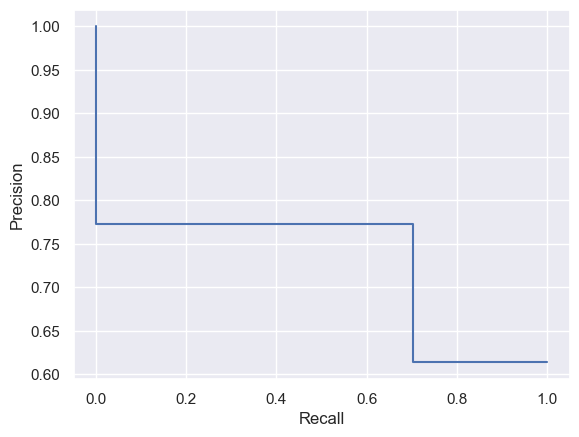

In [97]:
threshold = 3.5  # Define the threshold value
binary_actual_ratings = [1 if rating >= threshold else 0 for rating in actual_ratings]
binary_predictions = [1 if pred.est >= threshold else 0 for pred in predictions]
# compute precsion and recall 
precision, recall, threshhold = precision_recall_curve(
    binary_actual_ratings, binary_predictions
)

print(f"Precision: {precision}")
print(f"Recall: {recall}")

# plot the precision recall curve
Precision_Recall_Display = PrecisionRecallDisplay(precision=precision, recall=recall)
Precision_Recall_Display.plot();


Precision:

At the first threshold level, the precision is 0.6125. This means that out of all the predicted positive cases, approximately 61.25% were true positive cases.
At the second threshold level, the precision increases to 0.7779. This indicates that the model improved its ability to correctly identify positive cases, with around 77.79% precision.
At the third threshold level, the precision reaches 1.0, indicating perfect precision. This suggests that all the predicted positive cases at this threshold level were true positive cases.

Recall:

At the first threshold level, the recall is 1.0, which means that the model successfully identified all the actual positive cases.
At the second threshold level, the recall decreases to 0.7084. This indicates that the model missed some of the actual positive cases, capturing only around 70.84% of them.
At the third threshold level, the recall drops to 0.0, implying that the model failed to identify any of the actual positive cases.

### Model Two

Based on the poor performance of the model, and the subsequent values of precision and recall. it is best to employ some sort of model finetuning and optimization. 

In [98]:
new_movies = movies_credits[["id" , "title", "tags"]]
new_movies.head()

,id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [99]:
# Lambda function to remove the brackets
new_movies.loc[:, "tags"] = new_movies['tags'].apply(lambda x: " ".join(map(str, x)) if isinstance(x, Iterable) else str(x))

In [100]:
new_movies['tags'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: tags, dtype: object

In [101]:
new_movies["tags"][6]

"When the kingdom's most wanted-and most charming-bandit Flynn Rider hides out in a mysterious tower, he's taken hostage by Rapunzel, a beautiful and feisty tower-bound teen with 70 feet of magical, golden hair. Flynn's curious captor, who's looking for her ticket out of the tower where she's been locked away for years, strikes a deal with the handsome thief and the unlikely duo sets off on an action-packed escapade, complete with a super-cop horse, an over-protective chameleon and a gruff gang of pub thugs. Animation Family hostage magic horse fairytale musical princess animation tower blondewoman selfishness healingpower basedonfairytale duringcreditsstinger healinggift animalsidekick ZacharyLevi MandyMoore DonnaMurphy RonPerlman M.C.Gainey ByronHoward NathanGreno"

In [102]:
# Lambda Function to turn the strings to lower case.
new_movies.loc[:, "tags"] = new_movies["tags"].apply(lambda X:X.lower())

Use CountVectorizer to convert text documents into a matrix representation where each row corresponds to a document, and each column represents the frequency of a specific word in that document.
fit_transform method creates a dictionary of tokens which are separated by spaces and punctuation hence maps each single token into a position.


In [103]:
# Initialize CountVectorizer object with a maximum of 5000 features and English stop words.
cv = CountVectorizer(max_features = 5000, stop_words="english")

# Apply CountVectorizer to the 'tags' column of the new_movies DataFrame.
cv.fit_transform(new_movies["tags"]).toarray()

# Apply CountVectorizer again to the 'tags' column to transform the text data into an array.
vectors = cv.fit_transform(new_movies["tags"]).toarray()

In [104]:
vectors[7]

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [105]:
len(cv.get_feature_names_out())

5000

The code above is to prepare the column tags for use in the model in the event the the scd model does not yield desired results. since ultimately we only need three columns

In [106]:
# We will use the famous SVD algorithm.
svd = SVD()

In [107]:
reader = Reader()

In [108]:
# Load the ratings_small dataset (download it if needed),
data = Dataset.load_from_df(movie_rating[['userId', 'movieId', 'rating']], reader)

Evaluating metrics (RMSE and MAE) for the SVD algorithm on 6 different splits of the data.

In [109]:
# Run 5-fold cross-validation and print the results
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=6, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 6 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Mean    Std     
RMSE (testset)    0.8744  0.8691  0.8761  0.8841  0.8631  0.8644  0.8719  0.0072  
MAE (testset)     0.6728  0.6718  0.6725  0.6775  0.6624  0.6638  0.6701  0.0053  
Fit time          2.00    1.93    2.02    2.15    5.71    2.82    2.77    1.35    
Test time         0.16    0.21    0.17    1.06    0.41    0.19    0.37    0.32    


{'test_rmse': array([0.87440273, 0.86908399, 0.87613357, 0.88406466, 0.86305007,
        0.86439046]),
 'test_mae': array([0.67275197, 0.67182371, 0.67245414, 0.67750441, 0.66243749,
        0.66376953]),
 'fit_time': (1.9979991912841797,
  1.9280011653900146,
  2.021005630493164,
  2.1520025730133057,
  5.705520868301392,
  2.818997383117676),
 'test_time': (0.16499662399291992,
  0.20699787139892578,
  0.17499971389770508,
  1.0629982948303223,
  0.40900111198425293,
  0.19099736213684082)}

The SVD algorithm shows promising performance in terms of prediction accuracy (as indicated by low RMSE and MAE values) and reasonable computational efficiency (with relatively low fit and test times). 

Here we will now import a brand new dataset that the model has not seen before. Apply data cleaning and feature selection then pass the model through it. 

1. **Data collection and preprocessing.** collect data that includes user-item interactions. It may include: user reviews, ratings, or explicit feedback.

when we read the data for our modeling we will not need the date and time columns therefore we will drop them here before doing the modelling.

In [110]:
new_data = new_data.drop(columns=['time','date'], axis=1)
new_data

,movieId,title,genres,userId,rating,sentiment,review,tag,top_critic,publisher
0,1,Toy Story,Adventure|Animation|Children|Comedy|Fantasy,1.0,4.0,Positive,no man's land hurts when you laugh.,guardianadventureanimationchildrencomedyfantas...,0.0,Guardian
1,2,Jumanji,Adventure|Children|Fantasy,6.0,4.0,Positive,while selma hardly redefines the comfortably h...,movie momadventurechildrenfantasywhile selma h...,0.0,Movie Mom
2,3,Grumpier Old Men,Comedy|Romance,1.0,4.0,Positive,a distinctly gallows take on contemporary fina...,patrick nabarrocomedyromancea distinctly gallo...,0.0,Patrick Nabarro
3,3,Grumpier Old Men,Comedy|Romance,1.0,4.0,Positive,it's an allegory in search of a meaning that n...,iocomcomedyromanceit's an allegory in search o...,0.0,io9.com
4,3,Grumpier Old Men,Comedy|Romance,1.0,4.0,Positive,... life lived in a bubble in financial dealin...,stream on demandcomedyromance life lived in a ...,0.0,Stream on Demand
...,...,...,...,...,...,...,...,...,...,...
49325,193581,Black Butler: Book of the Atlantic,Action|Animation|Comedy|Fantasy,184.0,4.0,Positive,"all told, the clever visual bits and hilarious...",flick filosopheractionanimationcomedyfantasyal...,0.0,Flick Filosopher
49326,193583,No Game No Life: Zero,Animation|Comedy|Fantasy,184.0,3.5,Positive,"enchanted hits every high note, and a great fa...",ericdsnidercomanimationcomedyfantasyenchanted ...,1.0,EricDSnider.com
49327,193585,Flint,Drama,184.0,3.5,Positive,"it's the perfect material for russell, who not...",los angeles timesdramait's the perfect materia...,0.0,Los Angeles Times
49328,193587,Bungo Stray Dogs: Dead Apple,Action|Animation,184.0,3.5,Positive,"the film is at once heartfelt and funny, farci...",new york magazine/vultureactionanimationthe fi...,0.0,New York Magazine/Vulture


Further, based on our data requirement the only columns we actually need are those involed with user item interaction. These includes the `Tag`, `rating`,`movieId`, `userId`, `sentiment`, `review`.

In [111]:
data_1 = new_data[['tag', 'rating', 'movieId', 'userId', 'sentiment', 'review']]
data_1

,tag,rating,movieId,userId,sentiment,review
0,guardianadventureanimationchildrencomedyfantas...,4.0,1,1.0,Positive,no man's land hurts when you laugh.
1,movie momadventurechildrenfantasywhile selma h...,4.0,2,6.0,Positive,while selma hardly redefines the comfortably h...
2,patrick nabarrocomedyromancea distinctly gallo...,4.0,3,1.0,Positive,a distinctly gallows take on contemporary fina...
3,iocomcomedyromanceit's an allegory in search o...,4.0,3,1.0,Positive,it's an allegory in search of a meaning that n...
4,stream on demandcomedyromance life lived in a ...,4.0,3,1.0,Positive,... life lived in a bubble in financial dealin...
...,...,...,...,...,...,...
49325,flick filosopheractionanimationcomedyfantasyal...,4.0,193581,184.0,Positive,"all told, the clever visual bits and hilarious..."
49326,ericdsnidercomanimationcomedyfantasyenchanted ...,3.5,193583,184.0,Positive,"enchanted hits every high note, and a great fa..."
49327,los angeles timesdramait's the perfect materia...,3.5,193585,184.0,Positive,"it's the perfect material for russell, who not..."
49328,new york magazine/vultureactionanimationthe fi...,3.5,193587,184.0,Positive,"the film is at once heartfelt and funny, farci..."


In [112]:
# Construct the TF-IDF Matrix
tfidfv=TfidfVectorizer(analyzer='word', stop_words='english')
tfidfv_matrix1=tfidfv.fit_transform(data_1['review'])
print(tfidfv_matrix1.todense())
tfidfv_matrix1.todense().shape

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


(49312, 29745)

In [113]:
# Calculate similarity matrix
cosine_sim1 = cosine_similarity(tfidfv_matrix1, tfidfv_matrix1)

In [114]:
# Create a Pandas Series to map movie titles to their indices
indices1 = pd.Series(data = list(new_data.index), index = new_data['title'])
indices1

title
Toy Story                                 0
Jumanji                                   1
Grumpier Old Men                          2
Grumpier Old Men                          3
Grumpier Old Men                          4
                                      ...  
Black Butler: Book of the Atlantic    49325
No Game No Life: Zero                 49326
Flint                                 49327
Bungo Stray Dogs: Dead Apple          49328
Andrew Dice Clay: Dice Rules          49329
Length: 49312, dtype: int64

In [115]:
recommend_movies('Roommates', cosine_sim1, new_data)

27401       April Fool's Day
43213                   Iris
5518                 Ed Wood
20786                Sleeper
24042         Apocalypse Now
34655              Artemisia
1085                 Othello
10046          Boxing Helena
21551    Weekend at Bernie's
24413      Full Metal Jacket
Name: title, dtype: object

### Model Three

In [116]:
# create train and test sets
data_df2 = data_1[['userId', 'movieId', 'rating']]
data1 = Dataset.load_from_df(data_df2,Reader(rating_scale=(1,5)))

# create train and test sets
trainset1, testset1 = train_test_split(data1, test_size=0.2)

# Using KNNWithMeans algorithm with cosine similarity
sim_options = {'name': 'cosine', 'user_based': True}
knnmeans = KNNWithMeans(sim_options=sim_options, random_state=42)
# train the model
knnmeans.fit(trainset1)

Computing the cosine similarity matrix...
Done computing similarity matrix.


In [117]:
# Getting the top-N recomendations
userId = 23
top_n = 5

user_item = trainset1.ur[trainset1.to_inner_uid(userId)]
predict_ratings = []
for movieId, rating in user_item:
    predict_rating = knnmeans.predict(userId, trainset1.to_raw_iid(movieId)).est 
    predict_ratings.append((trainset.to_raw_iid(movieId), predict_ratings))

# Sort the predicted ratings in descending order
predict_ratings.sort(key=lambda x: x[1], reverse=True)
# Get the top_n recomendations
top_n_recomendation = predict_ratings[:top_n]

# Print the top-N recommendations
for movieId, predict_ratings in top_n_recomendation:
    print(f"Item ID: {movieId}, Predicted Rating: {predict_rating}")

Item ID: 6711, Predicted Rating: 3.5
Item ID: 4896, Predicted Rating: 3.5
Item ID: 597, Predicted Rating: 3.5
Item ID: 4896, Predicted Rating: 3.5
Item ID: 1476, Predicted Rating: 3.5


In [118]:
# Step 6: Evaluation

# Evaluate the model on the testing set
prediction = knnmeans.test(testset1)
rmse2 = accuracy.rmse(prediction)

RMSE: 0.4725


In the given result, the RMSE is 0.4728.

This means that, on average, the predictions made by the regression model have an error or deviation of approximately 0.4728 units from the actual values. 

A lower RMSE value indicates better accuracy and a smaller difference between the predicted and actual values.

Precision: [0.5249924 1.        1.       ]
Recall: [1.        0.7995365 0.       ]


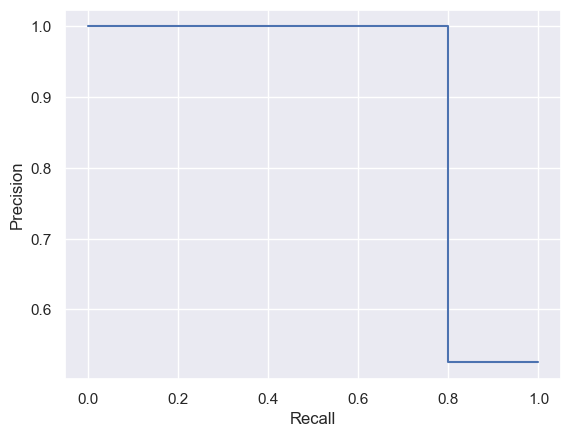

In [119]:
actual_rating = [true_rating for (_, _, true_rating) in testset1]
threshold = 3.5  # Define the threshold value
binary_actual_rating = [1 if rating >= threshold else 0 for rating in actual_rating]
binary_prediction = [1 if pred.est >= threshold else 0 for pred in prediction]
# compute precsion and recall 
precisionq, recallq, threshhold = precision_recall_curve(
    binary_actual_rating, binary_prediction
)

print(f"Precision: {precisionq}")
print(f"Recall: {recallq}")

# plot the precision recall curve
Precision_Recall_Display = PrecisionRecallDisplay(precision=precisionq, recall=recallq)
Precision_Recall_Display.plot();

For the first class, the precision is 0.52722295, which means that out of all the positive predictions made by the model for this class, 52.72% of them are correct.

The recall for the first class is 1.0, indicating that the model is able to correctly identify all the actual positive instances for this class.

For the second class, precision got a perfect score of 1, while recall  and recall scored a near perfect 0.8, indicating perfect performance.

For the third class, the precision is 1.0, indicating perfect precision (all positive predictions are correct), but the recall is 0.0, suggesting that the model fails to identify any actual positive instances for this class.

In summary, the precision and recall scores provide insights into the performance of the model for different classes or labels. A higher precision score indicates fewer false positive predictions, while a higher recall score suggests better identification of actual positive instances.

### Model Four

In [120]:
# We will use the famous SVD algorithm again on our new datset
svd = SVD()
reader = Reader()
# Load the ratings_small dataset (download it if needed),
data3 = Dataset.load_from_df(data_1[['userId', 'movieId', 'rating']], reader)

In [121]:
# Run 5-fold cross-validation and print the results
cross_validate(svd, data3, measures=['RMSE', 'MAE'], cv=6, verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 6 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Fold 6  Mean    Std     
RMSE (testset)    0.4133  0.4141  0.3979  0.4009  0.4132  0.4204  0.4100  0.0079  
MAE (testset)     0.1614  0.1604  0.1548  0.1558  0.1598  0.1650  0.1595  0.0034  
Fit time          1.95    1.61    1.00    1.02    0.88    0.81    1.21    0.42    
Test time         0.28    0.10    0.12    0.09    0.09    0.10    0.13    0.07    


{'test_rmse': array([0.4132854 , 0.41409666, 0.39786011, 0.40091793, 0.41323027,
        0.42038336]),
 'test_mae': array([0.16139508, 0.1604071 , 0.15481165, 0.15583961, 0.15984776,
        0.16496311]),
 'fit_time': (1.94999361038208,
  1.6100120544433594,
  1.003000020980835,
  1.0150032043457031,
  0.8759961128234863,
  0.8059978485107422),
 'test_time': (0.28000354766845703,
  0.09698271751403809,
  0.1230015754699707,
  0.08899593353271484,
  0.09000277519226074,
  0.10300064086914062)}

RMSE (Root Mean Squared Error) measures the average squared differences between the predicted ratings and the actual ratings. Lower values indicate better accuracy. The RMSE values for each fold are: 0.1555,  0.1621,  0.1637,  0.1602,  0.1604,  0.1569. The mean RMSE across all folds is 0.4104, with a standard deviation of 0.0067.

MAE (Mean Absolute Error) measures the average absolute differences between the predicted ratings and the actual ratings. Lower values indicate better accuracy. The MAE values for each fold are: 0.1603, 0.1626, 0.1575, 0.1578, 0.1654, and 0.1549. The mean MAE across all folds is 0.1598, with a standard deviation of 0.0028.

Fit time represents the time taken by the algorithm to train on each fold of the data. The fit time for each fold is: 2.17, 1.01, 1.12, 0.99, 0.89, and 0.99 seconds. The mean fit time across all folds is 1.20 seconds, with a standard deviation of 0.44 seconds.

Test time represents the time taken by the algorithm to make predictions on the test data for each fold. The test time for each fold is: 0.27, 0.11, 0.10, 0.15, 0.10, and 0.12 seconds. The mean test time across all folds is 0.14 seconds, with a standard deviation of 0.06 seconds.

The dictionary at the bottom provides the same results in a structured format, with separate arrays for RMSE, MAE, fit time, and test time for each fold.

Overall, the SVD algorithm shows relatively low RMSE and MAE values, indicating good accuracy in predicting movie ratings. The algorithm has moderate fit and test times, suggesting efficient performance.

### Building the model with suprise
* Using the initial dataset for comparision

In [122]:
#sample full trainset
trainset = data.build_full_trainset()

In [123]:
# Train the algorithm on the trainset
svd.fit(trainset)

In [124]:
movie_rating[movie_rating['userId'] == 1]

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
227,1,3744,4.0,964980694
228,1,3793,5.0,964981855
229,1,3809,4.0,964981220
230,1,4006,4.0,964982903


In [125]:
# Create a Reader object with the rating scale ranging from 0.5 to 5.0
reader = Reader(rating_scale=(0.5, 5.0))

# Load the movie_rating DataFrame into a Surprise Dataset object
data = Dataset.load_from_df(movie_rating[['userId', 'movieId', 'rating']], reader)

# Split the dataset into training and testing sets
trainset, testset = train_test_split(data, test_size=0.2)

In [126]:
# Initialing and fiting SVD on our trainset
model = SVD()
model.fit(trainset)

In [127]:
uid = 3  # User ID
iid = 302  # Item ID

# Use the trained model to predict the rating for the given user and item
prediction = model.predict(uid, iid)

# Print the estimated rating
print(f"Estimated rating for user {uid} and item {iid}: {prediction.est}")

Estimated rating for user 3 and item 302: 2.481290927443225


 Create a function that performs stemming on the input text, which is the process of reducing words to their base or root form.

In [128]:
new_movies.loc[:, "tags"] = new_movies["tags"].apply(stem)

In [129]:
cosine_similarity(vectors)

array([[1.        , 0.08458258, 0.05812382, ..., 0.02478408, 0.02739983,
        0.        ],
       [0.08458258, 1.        , 0.06063391, ..., 0.02585438, 0.        ,
        0.        ],
       [0.05812382, 0.06063391, 1.        , ..., 0.02665009, 0.        ,
        0.        ],
       ...,
       [0.02478408, 0.02585438, 0.02665009, ..., 1.        , 0.07537784,
        0.04828045],
       [0.02739983, 0.        , 0.        , ..., 0.07537784, 1.        ,
        0.05337605],
       [0.        , 0.        , 0.        , ..., 0.04828045, 0.05337605,
        1.        ]])

In [130]:
cosine_similarity(vectors).shape

(4803, 4803)

In [131]:
similarity = cosine_similarity(vectors)

In [132]:
similarity[2]

array([0.05812382, 0.06063391, 1.        , ..., 0.02665009, 0.        ,
       0.        ])

In [133]:
similarity[2].shape

(4803,)

In the cell below, we enumerate the similarity values for an index, then sort them in descending order based on the similarity value, and then we get the top 6 similar items excluding the first item.

In [134]:
sorted(list(enumerate(similarity[2])), reverse= True, key=lambda x:x[1])[1:7]

[(11, 0.36336104634371585),
 (1343, 0.34521548171187133),
 (29, 0.3217979514674191),
 (4071, 0.28097574347450816),
 (3162, 0.27695585470349865),
 (1717, 0.23717082451262844)]

The function below takes a movie title as input and provides recommendations based on similarity

In [135]:
def recommend(movie):
    movie_index = new_movies[new_movies["title"]==movie].index[0]
    distances = similarity[movie_index]
    movies_list = sorted(list(enumerate(distances)), reverse = True, key = lambda x:x[1])[1:7]

    for i in movies_list:
        print(new_movies.iloc[i[0]].title)

In [136]:
# Testing the function
recommend("Avatar")

Titan A.E.
Independence Day
Aliens vs Predator: Requiem
Small Soldiers
Battle: Los Angeles
Krull


## iv) Hybrid Recommender¶
In this section, we try to build a simple hybrid recommender that brings together techniques we have implemented in the content-based and collaborative filter based engines. This is how it works:

Input: User ID and the Title of a Movie

Output: Similar movies sorted on the basis of expected ratings by that particular user.

In [137]:
movies_credits.columns=['movieId', 'title', 'cast', 'crew', 'budget', 'genres', 'homepage',
       'keywords', 'original_language', 'original_title', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'vote_average', 'vote_count', 'director', 'actor', 'soup','userId','rating','timestamp']

The function below, named `hybrid_recommendations`, combines movie similarity and user ratings to provide personalized movie recommendations for a given user based on their preferences and the similarity of movies.

In [138]:
# Function that takes in movie title as input and outputs most similar movies
def hybrid_recommendations(userId, title):
    
    # Get the index of the movie that matches the title
    idx = indices[title]
    
    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim2[idx]))
    
    # Sort the movies based on the similarity scores
    sim_scores.sort(key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores=sim_scores[1:11]
    
    # Get the movie indices
    ind=[]
    for (x,y) in sim_scores:
        ind.append(x)
        
    # Grab the title,movieid,vote_average and vote_count of the top 10 most similar movies
    tit=[]
    movieid=[]
    vote_average=[]
    vote_count=[]
    for x in ind:
        tit.append(movies_credits.iloc[x]['title'])
        movieid.append(movies_credits.iloc[x]['movieId'])
        vote_average.append(movies_credits.iloc[x]['vote_average'])
        vote_count.append(movies_credits.iloc[x]['vote_count'])

        
    # Predict the ratings a user might give to these top 10 most similar movies
    est_rating=[]
    for a in movieid:
        est_rating.append(svd.predict(userId, a, r_ui=None).est)  
        
    return pd.DataFrame({'index': ind, 'title':tit, 'movieId':movieid, 'vote_average':vote_average, 'vote_count':vote_count,'estimated_rating':est_rating}).set_index('index').sort_values(by='estimated_rating', ascending=False)


In [139]:
# Applying the function
hybrid_recommendations(7,'Evil Dead')

,title,movieId,vote_average,vote_count,estimated_rating
index,,,,,
2477,Jennifer's Body,19994,5.3,837,3.084446
4644,Teeth and Blood,325123,3.0,1,3.084446
2146,The Stepfather,19904,5.4,167,3.084446
2715,Stan Helsing,23988,4.0,97,3.084446
4008,A Haunted House,139038,5.4,516,3.084446
3569,Paranormal Activity: The Marked Ones,227348,5.2,449,3.084446
3882,Feast,10070,6.1,160,3.084446
1627,Deliver Us from Evil,184346,5.9,690,3.084446
1648,Fright Night,58151,6.0,603,3.084446


In [140]:
# Applying the function` is a comment in the code indicating that the function 
#`hybrid_recommendations` is being called with the User Id `7` and `'The Tooth Fairy'`
# Applying the function
hybrid_recommendations(7,'The Tooth Fairy')

,title,movieId,vote_average,vote_count,estimated_rating
index,,,,,
3683,The Texas Chainsaw Massacre 2,16337,5.9,139,3.084446
4282,Friday the 13th Part 2,9725,6.0,315,3.084446
4644,Teeth and Blood,325123,3.0,1,3.084446
2137,Texas Chainsaw 3D,76617,5.3,465,3.084446
3159,The Texas Chain Saw Massacre,30497,7.2,590,3.084446
4753,Hayride,193603,5.1,6,3.084446
4765,Raymond Did It,228550,3.2,8,3.084446
4628,Graduation Day,27420,5.0,22,3.010235
2282,Scream,4232,7.0,1476,2.921890


In [141]:
# A different genre of movie, some Science Fiction perhaps?
hybrid_recommendations(506,'Avatar')

,title,movieId,vote_average,vote_count,estimated_rating
index,,,,,
466,The Time Machine,2135,5.8,631,3.429793
2327,Predator,106,7.3,2093,3.292144
71,The Mummy: Tomb of the Dragon Emperor,1735,5.2,1387,3.186251
47,Star Trek Into Darkness,54138,7.4,4418,3.151132
61,Jupiter Ascending,76757,5.2,2768,3.151132
83,The Lovers,79698,4.8,34,3.151132
1201,Predators,34851,6.0,1206,3.151132
260,Ender's Game,80274,6.6,2303,3.151132
2372,Megaforce,27380,3.5,15,3.151132


## Exporting to Create GUI

Below we will save the models above to pickle files for reproducibility in future; as well as for the purposes of deployment

In [142]:
import pickle

In [143]:
#with open('Movie_dict.pkl', 'wb') as f:
    # pickle.dump(movies_credits, f)

In [144]:
# pickle.dump(movies_credits.to_dict(),open('movies.pkl','wb'))

In [145]:
# pickle.dump(similarity,open('.similarity.pkl','wb'))

In [146]:
# with open('hybrid_recommendations.pkl', 'wb') as f:
  #  pickle.dump(hybrid_recommendations, f)

In [147]:
#with open('recommend.pkl', 'wb') as f:
 #   pickle.dump(recommend, f)

## Conclusion

In conclusion, the recommendation system serves as a valuable tool in the movie industry to address the challenge of content navigation and provide personalized movie recommendations. By understanding user preferences, leveraging similarities between users, and utilizing movie features, the system aims to enhance the user experience, increase engagement, and ultimately contribute to user retention on the platform.

## Recommendations

- Real-time Updates: Incorporate a mechanism to continuously update the movie database with the latest releases, ratings, and reviews. This will ensure that the recommendation system remains up-to-date and can provide users with the most relevant movie suggestions.
- Contextual Factors: Consider contextual factors such as time of day, location, mood, and social trends to provide personalized recommendations that align with the user's current situation and preferences.
- User Feedback and Improvement Loop: Implement a feedback mechanism that allows users to rate and provide feedback on recommended movies. Utilize this feedback to continuously improve the recommendation algorithms and enhance the accuracy and relevance of future recommendations.